In [1]:
import os, glob, sys
import numpy as np
import pickle
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import seaborn as sns
from scipy import signal
import shutil
import warnings
warnings.filterwarnings('ignore')

#clog('critical') 
import re

import generic_tools_pl as gt   # like hexcolor(), ...

In [2]:
region="48"

all_models=['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 
            'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', 
            'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0',
            'NorESM2-LM']


'''all_models=['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 
            'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', 
            'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MRI-ESM2-0',
            'NorESM2-LM']'''

"all_models=['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', \n            'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', \n            'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MRI-ESM2-0',\n            'NorESM2-LM']"

In [3]:
# Open the .nc file using xarray
#ds = xr.open_dataset('/usr/home/habbar/Bureau/data_nc/Projet-long-2022-2023/CNRM-CM6-1_hist-aer_Reg.nc')
ds = xr.open_dataset('/usr/home/habbar/Bureau/data_nc/Projet-long-2022-2023/MIROC6_hist-nat_Reg.nc')
# Convert the dataset to a Pandas DataFrame
df = ds.to_dataframe().reset_index()
# Print the DataFrame
df

,time,region,height,abbrevs,names,tas_r10i1p1f1_ano,tas_r11i1p1f1_ano,tas_r12i1p1f1_ano,tas_r13i1p1f1_ano,tas_r14i1p1f1_ano,...,tas_r47i1p1f1_ano,tas_r48i1p1f1_ano,tas_r49i1p1f1_ano,tas_r4i1p1f1_ano,tas_r50i1p1f1_ano,tas_r5i1p1f1_ano,tas_r6i1p1f1_ano,tas_r7i1p1f1_ano,tas_r8i1p1f1_ano,tas_r9i1p1f1_ano
0,1850-07-01 06:00:00,0,2.0,GIC,Greenland/Iceland,0.529006,0.156910,-0.748572,-0.266306,4.033313e-01,...,0.555446,-0.107292,0.276227,-0.724058,0.657262,-3.752261e-01,-0.317181,-0.529549,-0.284911,-0.404769
1,1850-07-01 06:00:00,1,2.0,NWN,N.W.North-America,1.314525,0.697502,-0.967086,0.349191,1.031497e+00,...,-0.579200,-2.026123,1.776397,1.709221,-0.722820,2.127446e+00,0.404891,-0.235725,0.176682,-0.136092
2,1850-07-01 06:00:00,2,2.0,NEN,N.E.North-America,-0.340097,2.131950,-1.687268,1.060546,8.258376e-01,...,1.514096,-0.063444,0.748219,0.013965,-0.256646,-3.898917e-01,0.388168,0.834490,-0.289623,0.217476
3,1850-07-01 06:00:00,3,2.0,WNA,W.North-America,1.258416,-0.464348,1.063978,-0.601160,4.747016e-01,...,-0.418121,-0.542144,0.164308,-0.299824,-1.811100,1.400038e+00,-0.231438,-1.199168,-0.598527,-0.719202
4,1850-07-01 06:00:00,4,2.0,CNA,C.North-America,0.461665,0.711502,-0.096760,-0.534195,3.163658e-01,...,0.125724,-0.532264,-2.082484,0.742872,-2.070372,1.195143e-01,-0.511991,-1.194839,0.502530,-0.348853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9565,2014-07-01 06:00:00,53,2.0,ARS,Arabian-Sea,-0.095399,-0.249597,0.484454,-0.002699,9.969210e+36,...,-0.133212,0.106355,0.343687,0.113630,-0.274232,9.969210e+36,-0.055918,0.144452,-0.088722,0.358597
9566,2014-07-01 06:00:00,54,2.0,BOB,Bay-of-Bengal,-0.101838,-0.040025,0.411468,0.246268,9.969210e+36,...,0.132983,-0.275614,0.374267,0.072539,-0.106709,9.969210e+36,-0.188736,0.157078,-0.227440,0.367384
9567,2014-07-01 06:00:00,55,2.0,EIO,Equatorial.Indic-Ocean,-0.113370,-0.212162,0.539564,0.154740,9.969210e+36,...,-0.053147,-0.059364,0.374155,0.172090,-0.150846,9.969210e+36,-0.145995,0.059797,-0.072611,0.391005
9568,2014-07-01 06:00:00,56,2.0,SIO,S.Indic-Ocean,0.067708,-0.118274,0.245511,0.080264,9.969210e+36,...,0.180379,-0.126726,0.192898,0.156351,0.039756,9.969210e+36,-0.031850,0.148756,-0.009197,0.112936


In [4]:
'''# Sélectionner les colonnes numériques à partir de la 4ème colonne
df_numeric = df.iloc[:, 3:].select_dtypes(include=[np.number])

# Supprimer les colonnes dont il existe une valeur supérieure à 59
df_filtered = df_numeric.loc[:, ~(df_numeric > 10).any(axis=0)]

# printer les noms des colonnes supprimées
print(df_numeric.columns.difference(df_filtered.columns))'''

'# Sélectionner les colonnes numériques à partir de la 4ème colonne\ndf_numeric = df.iloc[:, 3:].select_dtypes(include=[np.number])\n\n# Supprimer les colonnes dont il existe une valeur supérieure à 59\ndf_filtered = df_numeric.loc[:, ~(df_numeric > 10).any(axis=0)]\n\n# printer les noms des colonnes supprimées\nprint(df_numeric.columns.difference(df_filtered.columns))'

In [5]:
'''# rajouter les colonnes non selectionnées
df_filtered = pd.concat([df.iloc[:, :5], df_filtered], axis=1)

df_filtered'''

'# rajouter les colonnes non selectionnées\ndf_filtered = pd.concat([df.iloc[:, :5], df_filtered], axis=1)\n\ndf_filtered'

In [6]:
'''# remplacer le fichier netcdf de base par le nouveau
ds = df_filtered.to_xarray()
ds.to_netcdf('/usr/home/habbar/Bureau/Projet-long-2022-2023/MIROC6_hist-nat_Reg.nc')'''

"# remplacer le fichier netcdf de base par le nouveau\nds = df_filtered.to_xarray()\nds.to_netcdf('/usr/home/habbar/Bureau/Projet-long-2022-2023/MIROC6_hist-nat_Reg.nc')"

In [7]:
'''# rouvrir le fichier netcdf
ds1 = xr.open_dataset('/usr/home/habbar/Bureau/Projet-long-2022-2023/MIROC6_hist-nat_Reg.nc')
ds2 = xr.open_dataset('/usr/home/habbar/Bureau/Projet-long-2022-2023/MIROC6_hist-aer_Reg.nc')
print(ds1)
print(ds2)'''

"# rouvrir le fichier netcdf\nds1 = xr.open_dataset('/usr/home/habbar/Bureau/Projet-long-2022-2023/MIROC6_hist-nat_Reg.nc')\nds2 = xr.open_dataset('/usr/home/habbar/Bureau/Projet-long-2022-2023/MIROC6_hist-aer_Reg.nc')\nprint(ds1)\nprint(ds2)"

In [8]:
# Chemin d'accès vers les fichiers de modèle climatique
chemin_dacces = "/usr/home/habbar/Bureau/data_nc/Projet-long-2022-2023/*.nc"

nouveau_dossier = "/usr/home/habbar/Bureau/data_nc/region{}".format(region)
if not os.path.exists(nouveau_dossier):
    os.mkdir(nouveau_dossier)

# Boucle pour parcourir tous les fichiers de modèle climatique
for fichier in glob.glob(chemin_dacces):
    # Charger le fichier de modèle climatique dans un objet Dataset
    ds = xr.open_dataset(fichier)

    # Extraire les données de la zone spécifiée
    zone_region = ds.sel(region=int(region))

    # Écrire les données de la zone dans un nouveau fichier dans le nouveau dossier créé
    nouveau_fichier = os.path.join(nouveau_dossier, os.path.basename(fichier)[:-3] + f"_region{region}.nc").replace("\\", "/")
    zone_region.to_netcdf(nouveau_fichier)

In [9]:
# Open the .nc file using xarray
ds = xr.open_dataset("/usr/home/habbar/Bureau/data_nc/region{}/MIROC6_hist-nat_Reg_region{}.nc".format(region, region))
# Convert the dataset to a Pandas DataFrame
df = ds.to_dataframe().reset_index()
# Print the DataFrame
df

,time,height,region,abbrevs,names,tas_r10i1p1f1_ano,tas_r11i1p1f1_ano,tas_r12i1p1f1_ano,tas_r13i1p1f1_ano,tas_r14i1p1f1_ano,...,tas_r47i1p1f1_ano,tas_r48i1p1f1_ano,tas_r49i1p1f1_ano,tas_r4i1p1f1_ano,tas_r50i1p1f1_ano,tas_r5i1p1f1_ano,tas_r6i1p1f1_ano,tas_r7i1p1f1_ano,tas_r8i1p1f1_ano,tas_r9i1p1f1_ano
0,1850-07-01 06:00:00,2.0,48,EPO,Equatorial.Pacific-Ocean,0.368683,0.347013,-0.381859,-0.016979,3.160802e-01,...,-0.205883,-0.668628,0.941885,1.230066,0.174062,9.613701e-01,-0.504811,-0.769272,-0.319038,-0.383213
1,1851-07-01 06:00:00,2.0,48,EPO,Equatorial.Pacific-Ocean,1.304867,-0.836082,0.195356,0.465787,-1.414029e-01,...,-0.064460,-0.464764,0.718581,0.382888,-0.059194,2.971585e-01,-0.667909,-0.624045,0.019678,-0.439782
2,1852-07-01 06:00:00,2.0,48,EPO,Equatorial.Pacific-Ocean,0.238862,-0.806265,0.352013,0.227786,3.973209e-01,...,0.287275,0.711162,-0.184250,-0.975684,0.186425,-4.508146e-01,0.470264,-0.199416,0.436923,-0.222431
3,1853-07-01 06:00:00,2.0,48,EPO,Equatorial.Pacific-Ocean,-0.924709,-0.244760,0.383775,0.340703,1.045912e+00,...,0.799106,1.051387,-0.346319,-0.531524,0.817185,-4.120804e-01,0.029243,0.492953,0.976466,-0.558563
4,1854-07-01 06:00:00,2.0,48,EPO,Equatorial.Pacific-Ocean,-0.393633,0.300581,0.487239,0.914739,2.259217e-01,...,1.171089,-0.143270,0.283111,-0.254881,-0.043023,3.425747e-01,-0.178023,0.672822,0.190279,-0.296678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2010-07-01 06:00:00,2.0,48,EPO,Equatorial.Pacific-Ocean,-0.569996,0.032888,0.039580,-0.158320,9.969210e+36,...,0.332389,-0.411191,-0.015798,-0.727550,0.479237,9.969210e+36,0.624495,0.583758,-0.793167,0.256131
161,2011-07-01 06:00:00,2.0,48,EPO,Equatorial.Pacific-Ocean,-0.523152,-0.485519,0.430829,-0.164201,9.969210e+36,...,0.597886,0.247694,-0.645659,-0.694404,0.000405,9.969210e+36,0.506378,0.945458,-0.558352,0.078821
162,2012-07-01 06:00:00,2.0,48,EPO,Equatorial.Pacific-Ocean,0.183970,0.294595,0.813453,0.787596,9.969210e+36,...,0.797422,0.339915,-0.460697,-0.413065,-0.028878,9.969210e+36,-0.589448,0.811571,-0.005689,0.159873
163,2013-07-01 06:00:00,2.0,48,EPO,Equatorial.Pacific-Ocean,-0.164593,0.088366,1.245918,0.738894,9.969210e+36,...,0.072095,0.188136,0.460073,0.125519,-0.768458,9.969210e+36,-0.210448,0.363654,0.082142,0.673703


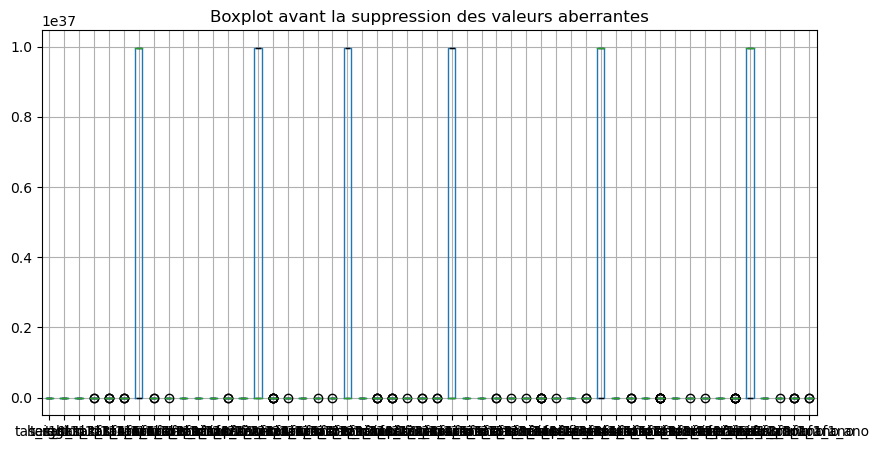

In [10]:
plt.figure(figsize=(10, 5))
plt.title("Boxplot avant la suppression des valeurs aberrantes")
df.boxplot()
plt.show()

In [11]:
# liste de modeles climatiques, triée par ordre alphabetique
data_dir_ = "/usr/home/habbar/Bureau/data_nc/region{}".format(region)

all_models = []
all_nc_files = np.sort(glob.glob(os.path.join(data_dir_,'*_hist-GHG_Reg_region{}.nc'.format(region))))

for f in np.sort(all_nc_files):
    basename = os.path.basename(f)
    #fname = basename.strip('_hist-GHG_Reg.nc')  # retire '_hist-GHG_Reg.nc' au nom de chaque fichier pour ne garder que le nom du modele climatique
    fname = basename.split('_')[0]  # prend le premier decoupage du nom du fichier, decoupant par '_', et qui correspond au nom du modele
    print(f,os.path.basename(f),fname)
    all_models.append(fname)

print(f"{len(all_models)} models found:\n {all_models}")

/usr/home/habbar/Bureau/data_nc/region48/ACCESS-ESM1-5_hist-GHG_Reg_region48.nc ACCESS-ESM1-5_hist-GHG_Reg_region48.nc ACCESS-ESM1-5
/usr/home/habbar/Bureau/data_nc/region48/BCC-CSM2-MR_hist-GHG_Reg_region48.nc BCC-CSM2-MR_hist-GHG_Reg_region48.nc BCC-CSM2-MR
/usr/home/habbar/Bureau/data_nc/region48/CESM2_hist-GHG_Reg_region48.nc CESM2_hist-GHG_Reg_region48.nc CESM2
/usr/home/habbar/Bureau/data_nc/region48/CNRM-CM6-1_hist-GHG_Reg_region48.nc CNRM-CM6-1_hist-GHG_Reg_region48.nc CNRM-CM6-1
/usr/home/habbar/Bureau/data_nc/region48/CanESM5_hist-GHG_Reg_region48.nc CanESM5_hist-GHG_Reg_region48.nc CanESM5
/usr/home/habbar/Bureau/data_nc/region48/FGOALS-g3_hist-GHG_Reg_region48.nc FGOALS-g3_hist-GHG_Reg_region48.nc FGOALS-g3
/usr/home/habbar/Bureau/data_nc/region48/GISS-E2-1-G_hist-GHG_Reg_region48.nc GISS-E2-1-G_hist-GHG_Reg_region48.nc GISS-E2-1-G
/usr/home/habbar/Bureau/data_nc/region48/HadGEM3-GC31-LL_hist-GHG_Reg_region48.nc HadGEM3-GC31-LL_hist-GHG_Reg_region48.nc HadGEM3-GC31-LL
/usr/

In [12]:
data_dir = '/usr/home/habbar/Bureau/data_nc/region{}'.format(region)
# Exemple de lecture du forcage GHG ...
#  Lecture des profils d’anomalies de température de l'air, forcage GHG, pour tous les modeles
all_forcings = ['GHG', 'AER', 'NAT', 'HIST']
all_forc_file_ext = ['hist-GHG', 'hist-aer', 'hist-nat', 'historical']

results_dict = {}

for model_name in all_models:
    model_dict = {}
    for forcing, forc_in_fname in zip(all_forcings, all_forc_file_ext):
        forcings_filename = f'{model_name}_{forc_in_fname}_Reg_region{region}.nc'
        
        profilsT_ds = xr.open_dataset(os.path.join(data_dir, forcings_filename))
        
        # comment savoir quelles variables de données dans le Dataset ?
        # c'est aussi la liste de membres du même forcage pour le modele en question
        list_nc_var = list(profilsT_ds.keys())

        model_dict[forcing] = len(list_nc_var)
        
        #del(profilsT_ds)
    results_dict[model_name] = model_dict

df = pd.DataFrame(results_dict)

All_sim=df.values
models=df.columns
forcings=df.index

# Chemin de sortie pour les fichiers
out_dir = '/usr/home/habbar/Bureau/data_nc/Out-My-nb-1'

# Créer un répertoire pour la région si celui-ci n'existe pas encore
region_dir = os.path.join(out_dir, "region{}".format(region))
if not os.path.exists(region_dir):
    os.makedirs(region_dir)

# Enregistrer All_sim_z48v0 comme fichier .p dans le répertoire de la région
with open(os.path.join(region_dir, "All_sim_z{}v0.p".format(region)), "wb") as f:
    pickle.dump(All_sim, f)

# Enregistrer models_z48v0 comme fichier .p dans le répertoire de la région
with open(os.path.join(region_dir, "models_z{}v0.p".format(region)), "wb") as f:
    pickle.dump(models.tolist(), f)

# Enregistrer forcings_z48v0 comme fichier .p dans le répertoire de la région
with open(os.path.join(region_dir, "forcings_z{}v0.p".format(region)), "wb") as f:
    pickle.dump(forcings.tolist(), f)

In [13]:
# Chemin d'accès vers les fichiers NetCDF
chemin_dacces = "/usr/home/habbar/Bureau/data_nc/region{}/*.nc".format(region)

# Liste des types de forçage
types_forçage = ['hist-GHG', 'hist-aer', 'hist-nat', 'historical']

# Liste des noms de modèles
noms_modeles = ['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0', 'NorESM2-LM']
#noms_modeles = ['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MRI-ESM2-0', 'NorESM2-LM']

# Boucle pour parcourir tous les types de forçage
for forçage in types_forçage:
    # Dictionnaire pour stocker les dataframes pour chaque modèle
    df_dict = {}

    # Boucle pour parcourir tous les fichiers NetCDF correspondant au type de forçage
    for fichier in glob.glob("/usr/home/habbar/Bureau/data_nc/region{}/*_{}_*.nc".format(region, forçage)):
        # Extraire le nom du modèle à partir du nom de fichier
        modele = [nom_modele for nom_modele in noms_modeles if nom_modele in fichier][0]

        # Vérifier si le modèle existe déjà dans le dictionnaire
        if modele not in df_dict:
            # Si le modèle n'existe pas, créer un nouveau dataframe
            df_dict[modele] = pd.DataFrame()

        # Ouvrir le fichier NetCDF et extraire les données
        ds = xr.open_dataset(fichier)
        df = ds.to_dataframe().reset_index()
        # print(df.iloc[:, :5].columns.values.tolist())
        df = df.loc[:,(list(ds.keys()))]
        df = df.transpose().reset_index().rename(columns={'index': 'Variable'})
        # Ajouter les données au dataframe correspondant
        df['modele'] = modele
        df_dict[modele] = pd.concat([df_dict[modele], df])

    # Vérifier si au moins un modèle a été traité pour le type de forçage
    if df_dict:
        # Vérifier si chaque dataframe pour le modèle contient des données
        df_dict_filtered = {k: v for k, v in df_dict.items() if not v.empty}
#       Trier les dataframes de chaque modèle en fonction de l'ordre des modèles
        df_dict_sorted = {modele: df_dict_filtered[modele] for modele in noms_modeles if modele in df_dict_filtered}
        # Concaténer les dataframes de tous les modèles pour le type de forçage
        df_concat = pd.concat(df_dict_sorted.values())
        # Add the 'modele' column as the first column
        df_concat.insert(0, 'modele', df_concat.pop('modele'))    
        # Écrire le dataframe dans un fichier CSV
        fichier_sortie = "/usr/home/habbar/Bureau/data_nc/Out-My-nb-1/region{}/{}_{}.csv".format(region, forçage, region)
        df_concat.to_csv(fichier_sortie, index=False)

        
        print(fichier_sortie)
        print(f"Données pour le type de forçage {forçage}: {df_concat.shape}")
    else:
        # Afficher un message d'avertissement si aucun modèle n'a été trouvé pour le type de forçage
        print(f"Aucun modèle trouvé pour le type de forçage {forçage}")

/usr/home/habbar/Bureau/data_nc/Out-My-nb-1/region48/hist-GHG_48.csv
Données pour le type de forçage hist-GHG: (103, 167)
/usr/home/habbar/Bureau/data_nc/Out-My-nb-1/region48/hist-aer_48.csv
Données pour le type de forçage hist-aer: (89, 167)
/usr/home/habbar/Bureau/data_nc/Out-My-nb-1/region48/hist-nat_48.csv
Données pour le type de forçage hist-nat: (160, 167)
/usr/home/habbar/Bureau/data_nc/Out-My-nb-1/region48/historical_48.csv
Données pour le type de forçage historical: (256, 167)


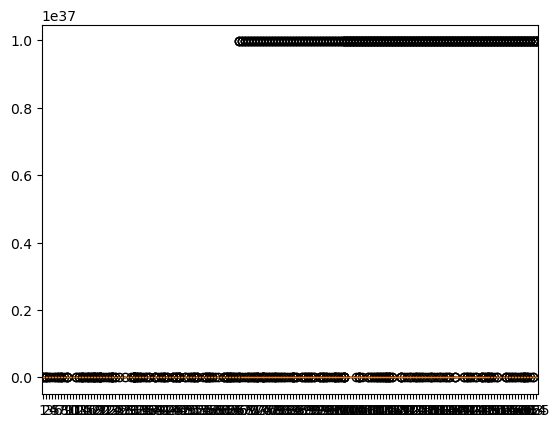

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv("/usr/home/habbar/Bureau/data_nc/Out-My-nb-1/region{}/hist-nat_{}.csv".format(region, region))

# Supprimer les deux premières colonnes
df = df.iloc[:, 2:]

# Créer un box plot des données restantes
plt.boxplot(df.values)
plt.show()

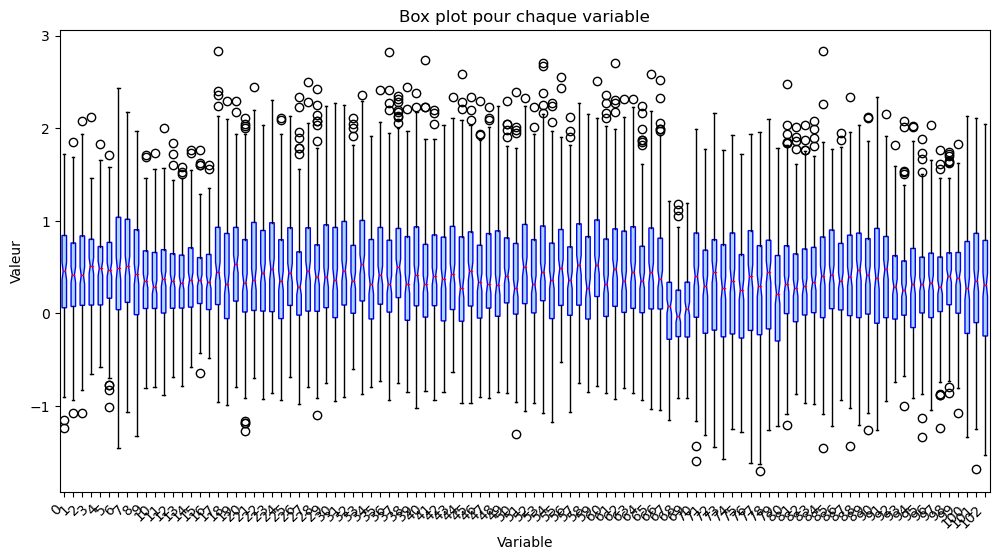

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le fichier CSV
df = pd.read_csv("/usr/home/habbar/Bureau/data_nc/Out-My-nb-1/region{}/hist-GHG_{}.csv".format(region, region))

# Supprimer les deux premières colonnes
df = df.iloc[:, 2:]
df = df.T
# Créer un box plot pour chaque colonne
fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot(df.values, patch_artist=True, notch=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                medianprops=dict(color='red'))

# Personnaliser les labels et l'axe des ordonnées
ax.set_xticklabels(df.columns, rotation=45, ha='right')
ax.set_ylabel('Valeur')
ax.set_xlabel('Variable')

# Ajouter une légende pour le box plot
box_colors = ['lightblue']*len(df.columns)
box_colors[0] = 'blue'
handles = [plt.Rectangle((0,0),1,1, color=box_colors[i]) for i in range(len(df.columns))]
labels = df.columns
ax.set_title('Box plot pour chaque variable')
plt.show()

In [16]:
# Charger le fichier CSV
df = pd.read_csv("/usr/home/habbar/Bureau/data_nc/Out-My-nb-1/region{}/hist-GHG_{}.csv".format(region, region))

# Supprimer les deux premières colonnes
df = df.iloc[:, 2:]
df=  df.T
# Diviser les colonnes en sous-ensembles de 20 variables
n_cols = len(df.columns)
subsets = [df.iloc[:, i:i+7] for i in range(0, n_cols, 7)]

'''
# Créer une matrice de corrélation pour chaque sous-ensemble
for i, subset in enumerate(subsets):
    corr_matrix = subset.corr()

    # Masquer les valeurs de corrélation faibles
    mask = np.zeros_like(corr_matrix)
    mask[np.triu_indices_from(mask)] = True

    # Afficher la matrice de corrélation
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, mask=mask)
    plt.title(f'Matrice de corrélation {i+1}')
    plt.show()
    # Afficher le diagramme de dispersion
    sns.pairplot(subset)
    plt.title(f'Diagramme de dispersion {i+1}')
    plt.show()
'''

"\n# Créer une matrice de corrélation pour chaque sous-ensemble\nfor i, subset in enumerate(subsets):\n    corr_matrix = subset.corr()\n\n    # Masquer les valeurs de corrélation faibles\n    mask = np.zeros_like(corr_matrix)\n    mask[np.triu_indices_from(mask)] = True\n\n    # Afficher la matrice de corrélation\n    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, mask=mask)\n    plt.title(f'Matrice de corrélation {i+1}')\n    plt.show()\n    # Afficher le diagramme de dispersion\n    sns.pairplot(subset)\n    plt.title(f'Diagramme de dispersion {i+1}')\n    plt.show()\n"

In [17]:
import pandas as pd

# chemin du dossier contenant les fichiers .nc
data_dir = '/usr/home/habbar/Bureau/data_nc/region{}'.format(region)

ds = xr.open_dataset("/usr/home/habbar/Bureau/data_nc/region{}/MIROC6_hist-nat_Reg_region{}.nc".format(region, region))

ds = ds.where((ds <= 20)).drop_vars(ds.coords)

ds = ds.fillna(ds.mean(dim=None))

ds.to_netcdf("/usr/home/habbar/Bureau/data_nc/region{}/MIROC6_hist-nat_Reg_region{}.nc".format(region, region))

'''

# parcours de tous les fichiers .nc dans le dossier
for file_name in os.listdir(data_dir):
    if file_name.endswith('.nc'):
        # ouverture du fichier netcdf avec xarray
        ds = xr.open_dataset(os.path.join(data_dir, file_name))

        # suppression des colonnes contenant des valeurs supérieures à 10
        ds = ds.where((ds <= 20)).drop_vars(ds.coords) 

        # remplacement des valeurs NaN par la moyenne des données
        ds = ds.fillna(ds.mean(dim=None))

        # enregistrement du fichier modifié
        ds.to_netcdf(os.path.join(data_dir, file_name))
        
'''

"\n\n# parcours de tous les fichiers .nc dans le dossier\nfor file_name in os.listdir(data_dir):\n    if file_name.endswith('.nc'):\n        # ouverture du fichier netcdf avec xarray\n        ds = xr.open_dataset(os.path.join(data_dir, file_name))\n\n        # suppression des colonnes contenant des valeurs supérieures à 10\n        ds = ds.where((ds <= 20)).drop_vars(ds.coords) \n\n        # remplacement des valeurs NaN par la moyenne des données\n        ds = ds.fillna(ds.mean(dim=None))\n\n        # enregistrement du fichier modifié\n        ds.to_netcdf(os.path.join(data_dir, file_name))\n        \n"

In [18]:
# Open the .nc file using xarray
ds = xr.open_dataset("/usr/home/habbar/Bureau/data_nc/region{}/MIROC6_hist-nat_Reg_region{}.nc".format(region, region))
# Convert the dataset to a Pandas DataFrame
df = ds.to_dataframe().reset_index()
# Print the DataFrame
df

,time,tas_r10i1p1f1_ano,tas_r11i1p1f1_ano,tas_r12i1p1f1_ano,tas_r13i1p1f1_ano,tas_r14i1p1f1_ano,tas_r15i1p1f1_ano,tas_r16i1p1f1_ano,tas_r17i1p1f1_ano,tas_r18i1p1f1_ano,...,tas_r47i1p1f1_ano,tas_r48i1p1f1_ano,tas_r49i1p1f1_ano,tas_r4i1p1f1_ano,tas_r50i1p1f1_ano,tas_r5i1p1f1_ano,tas_r6i1p1f1_ano,tas_r7i1p1f1_ano,tas_r8i1p1f1_ano,tas_r9i1p1f1_ano
0,0,0.368683,0.347013,-0.381859,-0.016979,0.316080,0.195754,-0.045111,-0.777167,0.168835,...,-0.205883,-0.668628,0.941885,1.230066,0.174062,0.961370,-0.504811,-0.769272,-0.319038,-0.383213
1,1,1.304867,-0.836082,0.195356,0.465787,-0.141403,0.029440,-0.252002,-0.295546,0.547379,...,-0.064460,-0.464764,0.718581,0.382888,-0.059194,0.297159,-0.667909,-0.624045,0.019678,-0.439782
2,2,0.238862,-0.806265,0.352013,0.227786,0.397321,0.104761,0.279980,0.391918,0.877641,...,0.287275,0.711162,-0.184250,-0.975684,0.186425,-0.450815,0.470264,-0.199416,0.436923,-0.222431
3,3,-0.924709,-0.244760,0.383775,0.340703,1.045912,-0.182615,0.977905,0.586999,0.754862,...,0.799106,1.051387,-0.346319,-0.531524,0.817185,-0.412080,0.029243,0.492953,0.976466,-0.558563
4,4,-0.393633,0.300581,0.487239,0.914739,0.225922,-0.214296,0.836000,0.276362,-0.113454,...,1.171089,-0.143270,0.283111,-0.254881,-0.043023,0.342575,-0.178023,0.672822,0.190279,-0.296678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,160,-0.569996,0.032888,0.039580,-0.158320,0.021188,-0.067861,0.258904,0.038094,-0.349018,...,0.332389,-0.411191,-0.015798,-0.727550,0.479237,0.051922,0.624495,0.583758,-0.793167,0.256131
161,161,-0.523152,-0.485519,0.430829,-0.164201,0.021188,-0.385575,1.068652,0.271192,-0.348755,...,0.597886,0.247694,-0.645659,-0.694404,0.000405,0.051922,0.506378,0.945458,-0.558352,0.078821
162,162,0.183970,0.294595,0.813453,0.787596,0.021188,0.238129,0.543158,0.105701,-0.243460,...,0.797422,0.339915,-0.460697,-0.413065,-0.028878,0.051922,-0.589448,0.811571,-0.005689,0.159873
163,163,-0.164593,0.088366,1.245918,0.738894,0.021188,0.209293,-1.037925,0.126580,0.121011,...,0.072095,0.188136,0.460073,0.125519,-0.768458,0.051922,-0.210448,0.363654,0.082142,0.673703


In [19]:
data_dir = '/usr/home/habbar/Bureau/data_nc/region{}'.format(region)

# Exemple de lecture du forcage GHG ...
#  Lecture des profils d’anomalies de température de l'air, forcage GHG, pour tous les modeles
all_models=['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 
                                             'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', 
                                             'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0',
                                             'NorESM2-LM']
all_forcings = ['GHG', 'AER', 'NAT', 'HIST']
all_forc_file_ext = ['hist-GHG', 'hist-aer', 'hist-nat', 'historical']

results_dict = {}

for model_name in all_models:
    model_dict = {}
    for forcing, forc_in_fname in zip(all_forcings, all_forc_file_ext):
        forcings_filename = f'{model_name}_{forc_in_fname}_Reg_region{region}.nc'
        
        profilsT_ds = xr.open_dataset(os.path.join(data_dir, forcings_filename))
        
        # comment savoir quelles variables de données dans le Dataset ?
        # c'est aussi la liste de membres du même forcage pour le modele en question
        list_nc_var = list(profilsT_ds.keys())

        model_dict[forcing] = len(list_nc_var)
        
        #del(profilsT_ds)
    results_dict[model_name] = model_dict

df = pd.DataFrame(results_dict)

All_sim=df.values
models=df.columns
forcings=df.index

# Chemin de sortie pour les fichiers
out_dir = '/usr/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region{}'.format(region)

# Enregistrer All_sim_z48v0 comme fichier .p
with open(os.path.join(out_dir, "All_sim_z{}v0.p".format(region)), "wb") as f:
    pickle.dump(All_sim, f)

# Enregistrer models_z48v0 comme fichier .p
with open(os.path.join(out_dir, "models_z{}v0.p".format(region)), "wb") as f:
    pickle.dump(models.tolist(), f)

# Enregistrer forcings_z48v0 comme fichier .p
with open(os.path.join(out_dir, "forcings_z{}v0.p".format(region)), "wb") as f:
    pickle.dump(forcings.tolist(), f)

In [20]:
# Chemin d'accès vers les fichiers NetCDF
chemin_dacces = '/usr/home/habbar/Bureau/data_nc/region{}/*.nc'.format(region)

# Liste des types de forçage
types_forçage = ['hist-GHG', 'hist-aer', 'hist-nat', 'historical']

# Liste des noms de modèles
noms_modeles = ['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0', 'NorESM2-LM']

# Boucle pour parcourir tous les types de forçage
for forçage in types_forçage:
    # Dictionnaire pour stocker les dataframes pour chaque modèle
    df_dict = {}

    # Boucle pour parcourir tous les fichiers NetCDF correspondant au type de forçage
    for fichier in glob.glob("/usr/home/habbar/Bureau/data_nc/region{}/*_{}_*_*.nc".format(region, forçage)):
        # Extraire le nom du modèle à partir du nom de fichier
        modele = [nom_modele for nom_modele in noms_modeles if nom_modele in fichier][0]

        # Vérifier si le modèle existe déjà dans le dictionnaire
        if modele not in df_dict:
            # Si le modèle n'existe pas, créer un nouveau dataframe
            df_dict[modele] = pd.DataFrame()

        # Ouvrir le fichier NetCDF et extraire les données
        ds = xr.open_dataset(fichier)
        df = ds.to_dataframe().reset_index()
        # print(df.iloc[:, :5].columns.values.tolist())
        df = df.loc[:,(list(ds.keys()))]
        df = df.transpose().reset_index().rename(columns={'index': 'Variable'})
        # Ajouter les données au dataframe correspondant
        df['modele'] = modele
        df_dict[modele] = pd.concat([df_dict[modele], df])

    # Vérifier si au moins un modèle a été traité pour le type de forçage
    if df_dict:
        # Vérifier si chaque dataframe pour le modèle contient des données
        df_dict_filtered = {k: v for k, v in df_dict.items() if not v.empty}
#       Trier les dataframes de chaque modèle en fonction de l'ordre des modèles
        df_dict_sorted = {modele: df_dict_filtered[modele] for modele in noms_modeles if modele in df_dict_filtered}
        # Concaténer les dataframes de tous les modèles pour le type de forçage
        df_concat = pd.concat(df_dict_sorted.values())
        # Add the 'modele' column as the first column
        df_concat.insert(0, 'modele', df_concat.pop('modele'))    
        # Écrire le dataframe dans un fichier CSV
        fichier_sortie = f"{forçage}_{region}.csv"
        df_concat.to_csv(fichier_sortie, index=False)

        print(f"Données pour le type de forçage {forçage}: {df_concat.shape}")
    else:
        # Afficher un message d'avertissement si aucun modèle n'a été trouvé pour le type de forçage
        print(f"Aucun modèle trouvé pour le type de forçage {forçage}")

Données pour le type de forçage hist-GHG: (103, 167)
Données pour le type de forçage hist-aer: (89, 167)
Données pour le type de forçage hist-nat: (160, 167)
Données pour le type de forçage historical: (256, 167)


In [21]:
# lire les fichiers csv en tant que dataframe
hist_GHG = pd.read_csv('hist-GHG_{}.csv'.format(region))
hist_aer = pd.read_csv('hist-aer_{}.csv'.format(region))
hist_nat = pd.read_csv('hist-nat_{}.csv'.format(region))
historical = pd.read_csv('historical_{}.csv'.format(region))

# supprimer les deux premières colonnes de chaque dataframe
hist_GHG = hist_GHG.iloc[:, 2:]
hist_aer = hist_aer.iloc[:, 2:]
hist_nat = hist_nat.iloc[:, 2:]
historical = historical.iloc[:, 2:]


# convertir chaque dataframe en tableau numpy (array)
hist_GHG = np.array(hist_GHG)
hist_aer = np.array(hist_aer)
hist_nat = np.array(hist_nat)
historical = np.array(historical)

#Lissage 
'''filt_dic={ 'n':4, 'Wn':[1./10.], 'btype':'lowpass'}
b_lp_filter, a_lp_filter = gt.filtering_forcing_signal_f(filt_dic, verbose=False)

hist_GHG = signal.filtfilt(b_lp_filter, a_lp_filter, hist_GHG)
hist_aer = signal.filtfilt(b_lp_filter, a_lp_filter, hist_aer)
hist_nat = signal.filtfilt(b_lp_filter, a_lp_filter, hist_nat)
historical = signal.filtfilt(b_lp_filter, a_lp_filter, historical)


plt.plot(hist_GHG[:,:].T)'''
# Afficher le nombre de lignes et de colonnes du dataframe

# Définir le chemin où sauvegarder les fichiers .p
output_path = "/usr/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region{}".format(region)

# Sauvegarder chaque tableau numpy en tant que fichier .p
with open(os.path.join(output_path, 'T_ghg_z{}v0.p'.format(region)), 'wb') as f:
    pickle.dump(hist_GHG, f)
with open(os.path.join(output_path, 'T_aer_z{}v0.p'.format(region)), 'wb') as f:
    pickle.dump(hist_aer, f)
with open(os.path.join(output_path, 'T_nat_z{}v0.p'.format(region)), 'wb') as f:
    pickle.dump(hist_nat, f)
with open(os.path.join(output_path, 'T_hist_z{}v0.p'.format(region)), 'wb') as f:
    pickle.dump(historical, f)

In [22]:
# ouvrir le fichier .p en tant que tableau numpy
path = "/usr/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region{}/T_nat_z{}v0.p".format(region,region)
with open(path, 'rb') as f:
    data = pickle.load(f)
    
# la valeur max et min 
print(data.max())
print(data.min())

1.6173847913742063
-2.1033044103318512


In [23]:
# Open the .nc file using xarray
ds = xr.open_dataset('/usr/home/habbar/Bureau/data_nc/HadCRUT-Regions/data/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.region.nc')
# Convert the dataset to a Pandas DataFrame
df_hadcrut = ds.to_dataframe().reset_index()
df_hadcrut
# Print the DataFrame
# df.to_csv("hadCrut.csv",index=False) 

,time,region,realization,abbrevs,names,tas_mean
0,1850,0,100,GIC,Greenland/Iceland,-0.340999
1,1850,1,100,NWN,N.W.North-America,-0.470905
2,1850,2,100,NEN,N.E.North-America,-0.439982
3,1850,3,100,WNA,W.North-America,0.144394
4,1850,4,100,CNA,C.North-America,0.069595
...,...,...,...,...,...,...
10087,2023,53,100,ARS,Arabian-Sea,0.448849
10088,2023,54,100,BOB,Bay-of-Bengal,0.330094
10089,2023,55,100,EIO,Equatorial.Indic-Ocean,0.266170
10090,2023,56,100,SIO,S.Indic-Ocean,0.294436


In [24]:
# Chemin d'accès vers les fichiers de modèle climatique
chemin_dacces = "/usr/home/habbar/Bureau/data_nc/HadCRUT-Regions/data/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.region.nc"
nouveau_dossier = "/usr/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region{}/HadCRUT".format(region)
if not os.path.exists(nouveau_dossier):
    os.mkdir(nouveau_dossier)

# Boucle pour parcourir tous les fichiers de modèle climatique
for fichier in glob.glob(chemin_dacces):
    # Charger le fichier de modèle climatique dans un objet Dataset
    ds = xr.open_dataset(fichier)

    # Extraire les données de la zone spécifiée
    zone_region = ds.sel(region=int(region))

# Écrire les données de la zone dans un nouveau fichier dans le nouveau dossier créé
    nouveau_fichier = os.path.join(nouveau_dossier, os.path.basename(fichier))
    zone_region.to_netcdf(nouveau_fichier)

In [25]:
path = "/usr/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region{}/HadCRUT/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.region.nc".format(region)

# Lire le fichier HadCRUT
ds = xr.open_dataset(path)
# Convertir le dataset en dataframe
df_hadcrut = ds.to_dataframe().reset_index()
# Afficher le dataframe
df_hadcrut

,time,realization,region,abbrevs,names,tas_mean
0,1850,100,48,EPO,Equatorial.Pacific-Ocean,-0.380147
1,1851,100,48,EPO,Equatorial.Pacific-Ocean,-0.347901
2,1852,100,48,EPO,Equatorial.Pacific-Ocean,-0.083997
3,1853,100,48,EPO,Equatorial.Pacific-Ocean,-0.154334
4,1854,100,48,EPO,Equatorial.Pacific-Ocean,-0.311158
...,...,...,...,...,...,...
169,2019,100,48,EPO,Equatorial.Pacific-Ocean,0.812390
170,2020,100,48,EPO,Equatorial.Pacific-Ocean,0.473022
171,2021,100,48,EPO,Equatorial.Pacific-Ocean,0.201239
172,2022,100,48,EPO,Equatorial.Pacific-Ocean,-0.036385


In [26]:
#test1 = pd.read_csv("/usr/home/habbar/Bureau/data_nc/hist-nat_{}.csv".format(region))
test1 = pd.read_csv("hist-nat_{}.csv".format(region))

df=test1[test1.modele.str.contains("MIROC6")]
df

,modele,Variable,0,1,2,3,4,5,6,7,...,155,156,157,158,159,160,161,162,163,164
102,MIROC6,tas_r10i1p1f1_ano,0.368683,1.304867,0.238862,-0.924709,-0.393633,-0.184284,-0.132564,0.153411,...,-0.084256,0.285887,0.378407,1.192191,0.562248,-0.569996,-0.523152,0.183970,-0.164593,0.259715
103,MIROC6,tas_r11i1p1f1_ano,0.347013,-0.836082,-0.806265,-0.244760,0.300581,1.022799,-0.135230,-0.677223,...,-0.670174,-0.148444,-0.186377,0.672529,0.938320,0.032888,-0.485519,0.294595,0.088366,-0.336370
104,MIROC6,tas_r12i1p1f1_ano,-0.381859,0.195356,0.352013,0.383775,0.487239,0.036310,0.117364,0.291474,...,-0.419687,-0.151447,0.229566,0.388504,0.466755,0.039580,0.430829,0.813453,1.245918,0.034868
105,MIROC6,tas_r13i1p1f1_ano,-0.016979,0.465787,0.227786,0.340703,0.914739,0.010237,-0.624608,0.107137,...,0.949866,1.442584,0.063174,-0.710486,-0.402600,-0.158320,-0.164201,0.787596,0.738894,0.242768
106,MIROC6,tas_r14i1p1f1_ano,0.316080,-0.141403,0.397321,1.045912,0.225922,-0.933141,-0.796490,-0.574673,...,0.021188,0.021188,0.021188,0.021188,0.021188,0.021188,0.021188,0.021188,0.021188,0.021188
107,MIROC6,tas_r15i1p1f1_ano,0.195754,0.029440,0.104761,-0.182615,-0.214296,0.285427,-0.224809,-0.228358,...,0.405320,-0.080888,0.232196,0.792577,0.938442,-0.067861,-0.385575,0.238129,0.209293,-0.188628
108,MIROC6,tas_r16i1p1f1_ano,-0.045111,-0.252002,0.279980,0.977905,0.836000,-0.805704,-0.690860,-0.114357,...,0.146857,0.831413,0.734633,-0.558280,-0.539769,0.258904,1.068652,0.543158,-1.037925,-0.758086
109,MIROC6,tas_r17i1p1f1_ano,-0.777167,-0.295546,0.391918,0.586999,0.276362,-0.056060,-0.345237,-0.246967,...,0.198065,-0.572298,-0.528025,-0.280616,-0.150345,0.038094,0.271192,0.105701,0.126580,0.355174
110,MIROC6,tas_r18i1p1f1_ano,0.168835,0.547379,0.877641,0.754862,-0.113454,-0.852452,-0.479595,0.054365,...,0.156715,-0.151723,-0.322250,0.673657,0.318171,-0.349018,-0.348755,-0.243460,0.121011,0.395491
111,MIROC6,tas_r19i1p1f1_ano,-0.155130,-0.116652,-0.018237,0.230722,0.067869,-0.208996,-0.217130,0.156049,...,0.350681,-0.185420,0.141115,0.082632,0.441820,0.505698,-0.138765,-0.003691,0.405042,0.904933


In [27]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.039921,0.023398,0.064163,0.177997,0.151292,0.059702,0.001302,-0.032725,0.016330,0.115256,...,0.028497,0.025978,0.041705,0.110573,0.170582,0.124806,0.078406,0.121572,0.031993,0.122814
std,0.531875,0.417907,0.456114,0.558525,0.408873,0.558565,0.464938,0.433166,0.488563,0.393025,...,0.461443,0.431878,0.396893,0.417807,0.458916,0.480606,0.514293,0.397738,0.475753,0.448989
min,-0.830418,-0.836082,-0.990916,-0.924709,-0.463983,-1.093693,-0.796490,-0.911280,-1.207842,-0.634310,...,-1.141505,-0.734551,-0.786216,-0.710486,-0.818832,-1.082522,-0.744187,-0.641459,-1.037925,-0.758086
25%,-0.338854,-0.194885,-0.197287,-0.206536,-0.161727,-0.293237,-0.295217,-0.286198,-0.238517,-0.152265,...,-0.275260,-0.261965,-0.222398,-0.136639,-0.102817,-0.147969,-0.282876,-0.142782,-0.203858,-0.150342
50%,-0.035064,-0.020381,0.118726,0.172790,0.143321,0.037362,-0.049906,-0.064573,0.100341,0.164045,...,0.042549,0.009851,0.068073,0.047538,0.050841,0.071368,0.044325,0.104553,0.082026,0.071210
75%,0.292806,0.277985,0.364085,0.523931,0.305953,0.394056,0.292064,0.285019,0.334306,0.314528,...,0.211785,0.182775,0.250893,0.368916,0.543019,0.378514,0.344215,0.318769,0.321726,0.359853
max,1.337983,1.304867,0.926109,1.149875,1.171089,1.407290,1.176630,1.128566,0.966285,0.974205,...,1.282111,1.442584,1.070122,1.192191,1.083077,1.406937,1.397294,1.017237,1.245918,0.985962


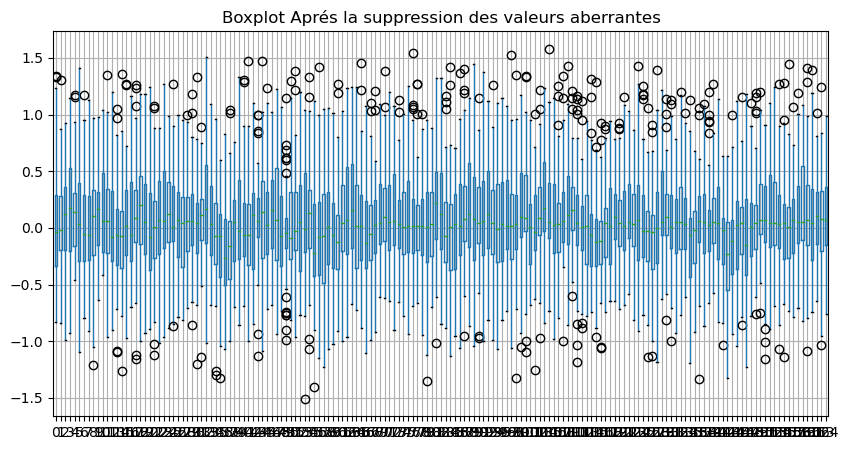

In [28]:
# Visualiser le boxplot avant la suppression des valeurs aberrantes
plt.figure(figsize=(10, 5))
plt.title("Boxplot Aprés la suppression des valeurs aberrantes")
df.boxplot()
plt.show()

In [29]:
df = df.drop(columns=["modele","Variable"]).values

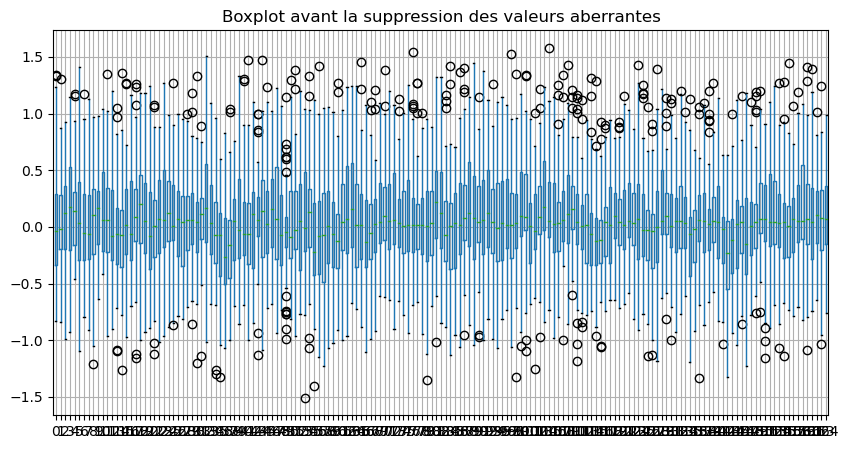

Nombre de lignes supprimées :  43


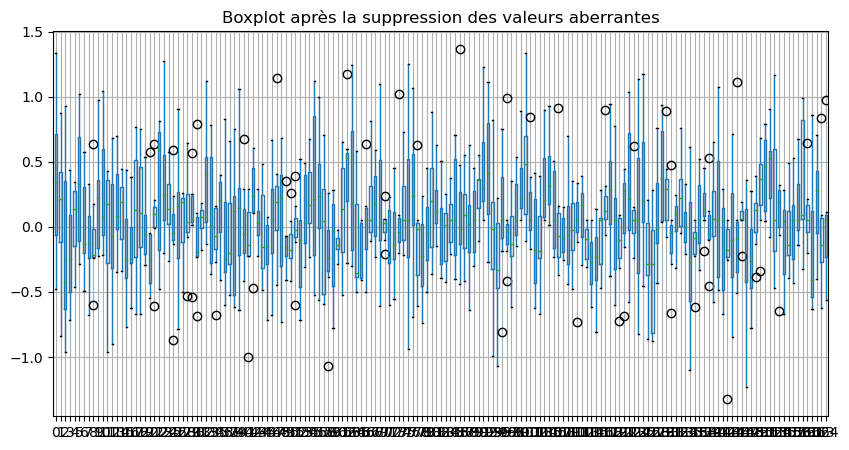

In [30]:
# Visualiser le boxplot avant la suppression des valeurs aberrantes
plt.figure(figsize=(10, 5))
plt.title("Boxplot avant la suppression des valeurs aberrantes")
df = pd.DataFrame(df)
df.boxplot()
plt.show()

# Identifier les valeurs aberrantes avec l'écart interquartile (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
aberrant = ((df < (Q1 - 1.8 * IQR)) | (df > (Q3 + 1.8 * IQR))).any(axis=1)

# Supprimer les lignes contenant des valeurs aberrantes
df_clean = df[~aberrant]
# Afficher le nombre de lignes supprimées
print("Nombre de lignes supprimées : ", len(df) - len(df_clean))

# Visualiser le boxplot après la suppression des valeurs aberrantes
plt.figure(figsize=(10, 5))
plt.title("Boxplot après la suppression des valeurs aberrantes")
df_clean.boxplot()
plt.show()

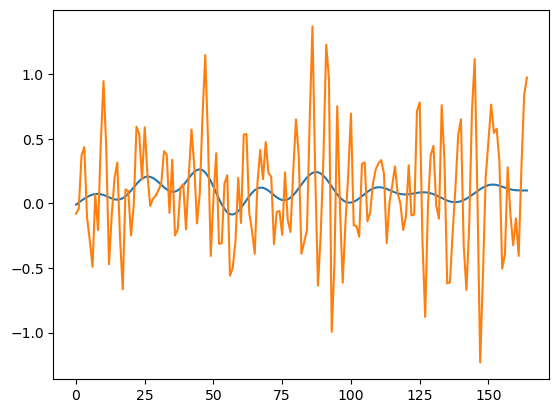

In [31]:
import generic_tools_pl as gt
from scipy import signal

filt_dic={ 'n':4, 'Wn':[1./10.], 'btype':'lowpass'}
b_lp_filter, a_lp_filter = gt.filtering_forcing_signal_f(filt_dic, verbose=False)
df_clean_np = df_clean.to_numpy()
tmp_filtered_arr = signal.filtfilt(b_lp_filter, a_lp_filter, df_clean_np, padtype=None)
plt.plot(tmp_filtered_arr[1,:].T)
plt.plot(df_clean_np[1,:].T)

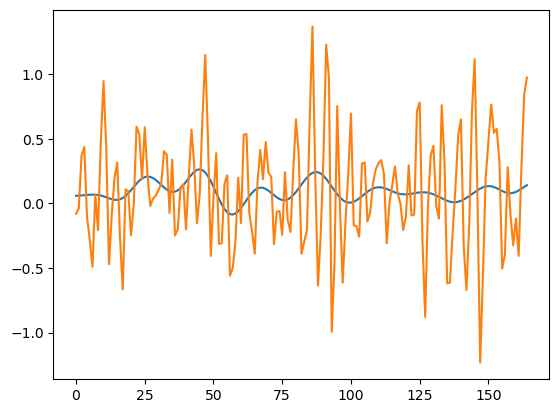

In [32]:
import generic_tools_pl as gt
from scipy import signal

filt_dic={ 'n':4, 'Wn':[1./10.], 'btype':'lowpass'}
b_lp_filter, a_lp_filter = gt.filtering_forcing_signal_f(filt_dic, verbose=False)
df_clean_np = df_clean.to_numpy()
tmp_filtered_arr = signal.filtfilt(b_lp_filter, a_lp_filter, df_clean_np, method='gust')
plt.plot(tmp_filtered_arr[1,:].T)
plt.plot(df_clean_np[1,:].T)

In [33]:
import pandas as pd


# Charger le dataset dans un DataFrame
df = pd.read_csv("historical_48.csv")

print(df)

            modele           Variable         0         1         2         3  \
0    ACCESS-ESM1-5  tas_r10i1p1f1_ano -0.149256 -0.569931 -0.242309 -0.565678   
1    ACCESS-ESM1-5  tas_r11i1p1f1_ano -0.140877 -0.575243  0.327592  0.291398   
2    ACCESS-ESM1-5  tas_r12i1p1f1_ano  0.572594 -0.043521  0.419102  0.392004   
3    ACCESS-ESM1-5  tas_r13i1p1f1_ano  0.141619  0.266747  0.120515  0.395978   
4    ACCESS-ESM1-5  tas_r14i1p1f1_ano -0.118604  0.188049  0.580067  0.316786   
..             ...                ...       ...       ...       ...       ...   
251     MRI-ESM2-0   tas_r8i1p1f1_ano -0.003867  0.101668  0.456620  0.215709   
252     MRI-ESM2-0   tas_r9i1p1f1_ano  0.404228  0.059687 -0.056593  0.330903   
253     NorESM2-LM   tas_r1i1p1f1_ano  0.098773  0.776600 -0.186342  0.856486   
254     NorESM2-LM   tas_r2i1p1f1_ano -0.268393 -0.338989 -0.389957  0.204932   
255     NorESM2-LM   tas_r3i1p1f1_ano  0.167527  0.298653  1.206703  0.139703   

            4         5    

/tmp/ipykernel_2837/227338647.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_GHG = df_GHG.groupby('modele').mean()
/tmp/ipykernel_2837/227338647.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_NAT = df_NAT.groupby('modele').mean()
/tmp/ipykernel_2837/227338647.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_AER = df_AER.groupby('modele').mean()


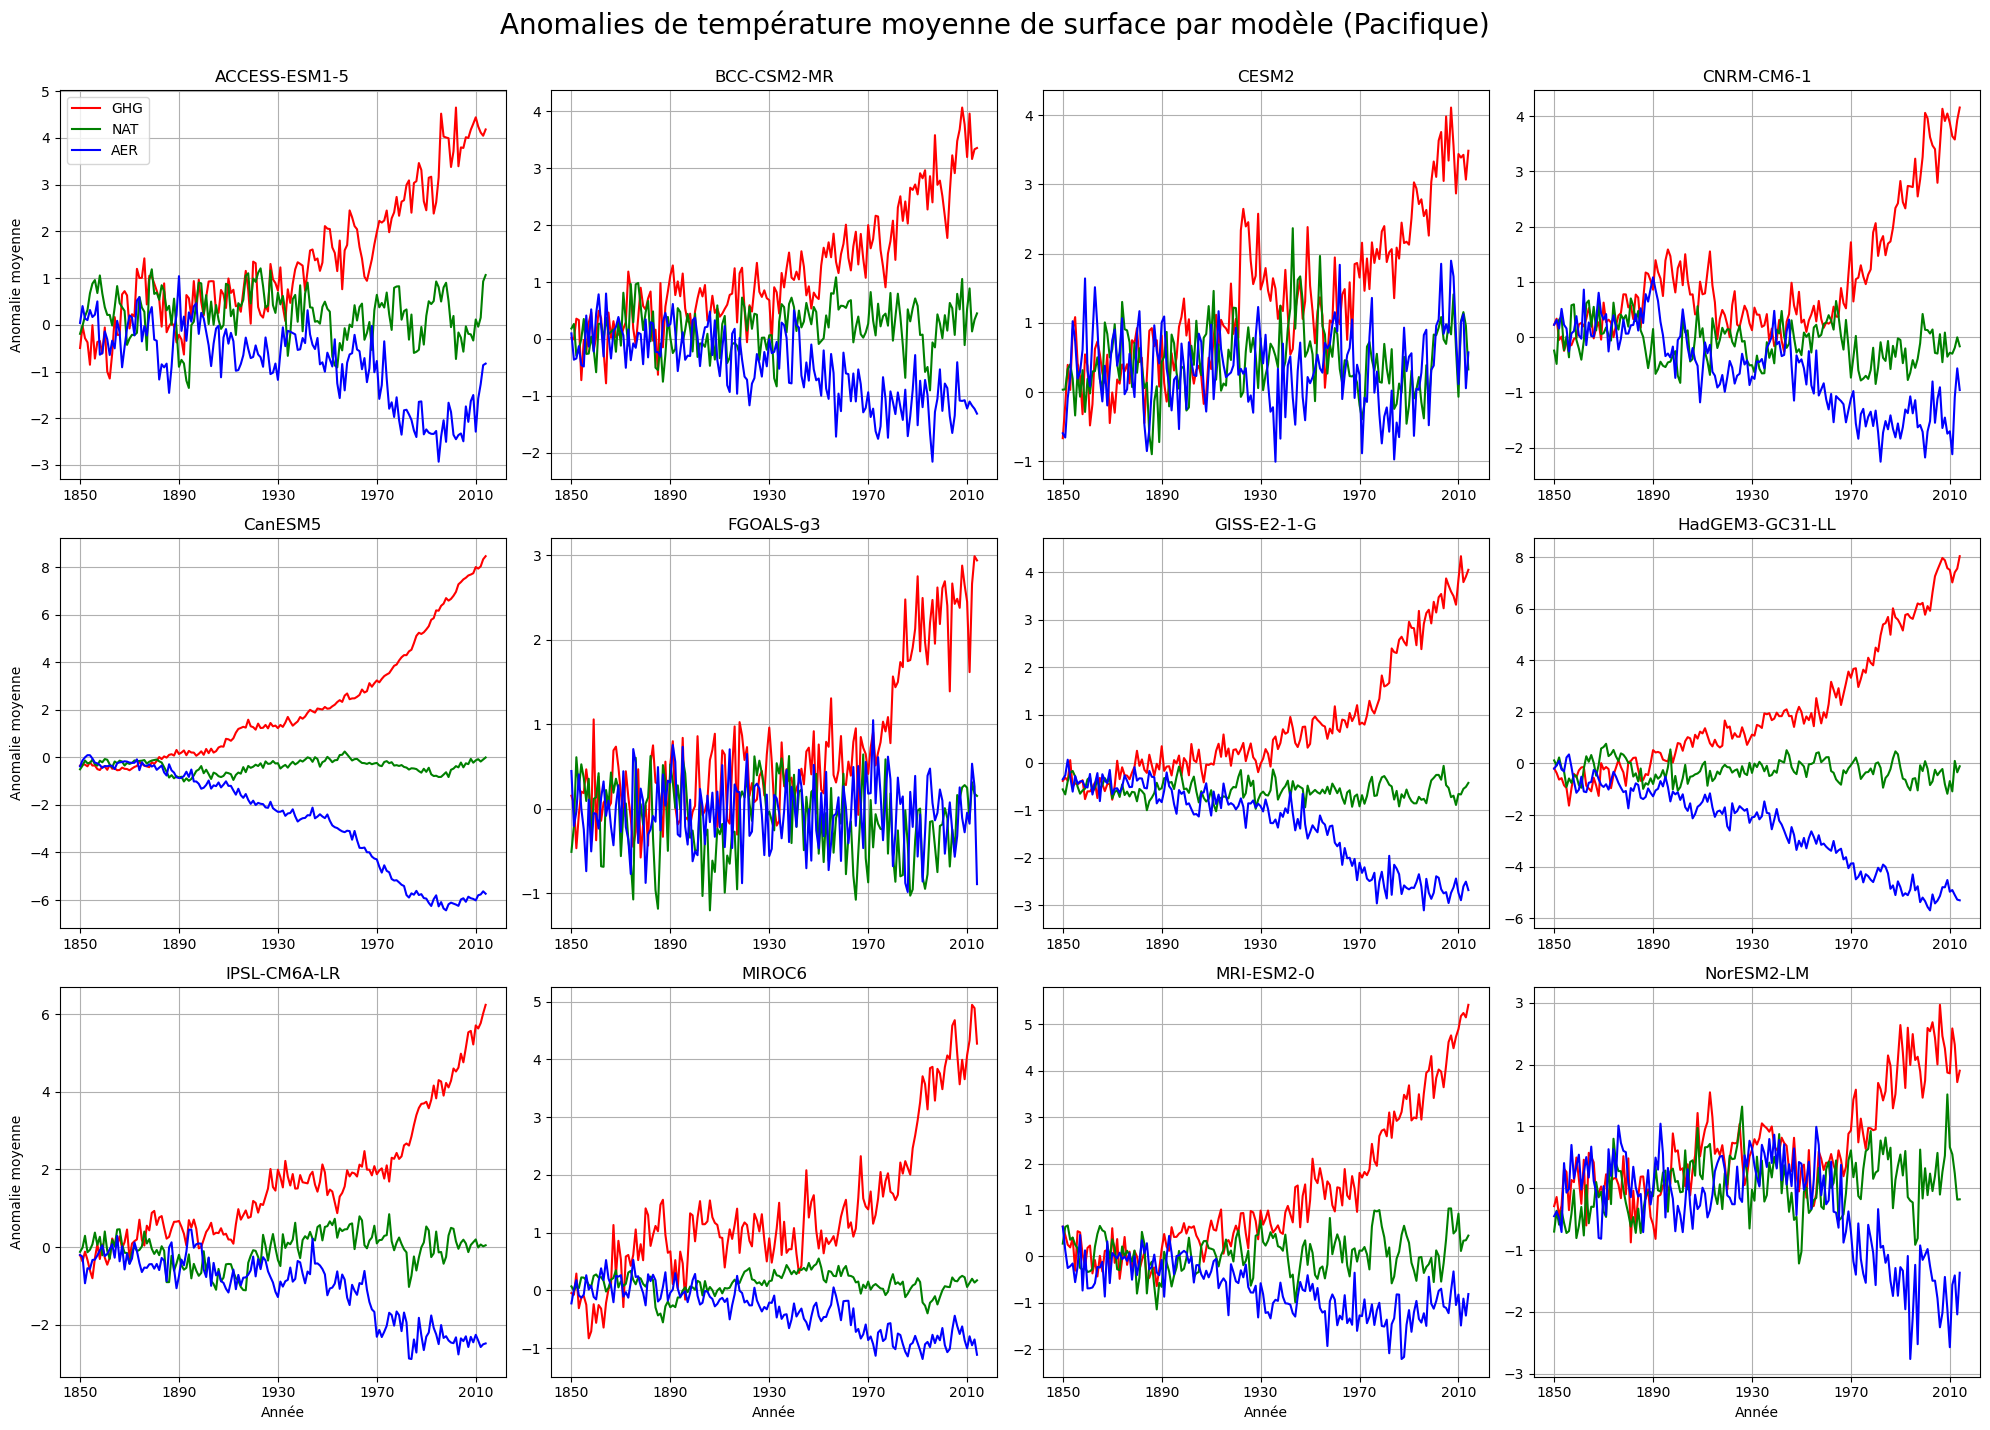

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le dataset GHG dans un DataFrame
df_GHG = pd.read_csv("hist-GHG_46.csv")
df_mean_GHG = df_GHG.groupby('modele').mean()

# Charger le dataset NAT dans un DataFrame
df_NAT = pd.read_csv("hist-nat_46.csv")
df_mean_NAT = df_NAT.groupby('modele').mean()

# Charger le dataset AER dans un DataFrame
df_AER = pd.read_csv("hist-aer_46.csv")
df_mean_AER = df_AER.groupby('modele').mean()

# Extraire les noms de modèles uniques
modeles = df_GHG['modele'].unique()

# Créer une figure avec une grille 3x4 pour les sous-graphiques
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# titre de la figure
fig.suptitle('Anomalies de température moyenne de surface par modèle (Pacifique)', fontsize=20)

# Parcourir les modèles et tracer les graphiques
for i, modele in enumerate(modeles):
    # Obtenir les anomalies moyennes pour le modèle donné dans chaque dataset
    anomalies_GHG = df_mean_GHG.loc[modele, :].values
    anomalies_NAT = df_mean_NAT.loc[modele, :].values
    anomalies_AER = df_mean_AER.loc[modele, :].values
    
    # Calculer les coordonnées du sous-graphique correspondant
    row = i // 4
    col = i % 4
    
    # Tracer le graphique sur le sous-graphique correspondant
    ax = axes[row, col]
    ax.plot(anomalies_GHG, label='GHG', color='red')
    ax.plot(anomalies_NAT, label='NAT', color='green')
    ax.plot(anomalies_AER, label='AER', color = 'blue')
    ax.grid()
    
    # Ajouter le titre et les divisions des axes pour les sous-graphiques de la première colonne et de la première ligne
    if col == 0:
        ax.set_ylabel('Anomalie moyenne')
    if row == 2:
        ax.set_xlabel('Année')
    
    # Ajouter le titre pour le sous-graphique de la première colonne
    axes[row, col].set_title(modele)
    ax.set_xticks(range(0, len(anomalies_GHG), 40))
    ax.set_xticklabels(range(1850, 2015, 40))
    
    # Afficher la légende
    if row == 0 and col == 0:
        ax.legend()
    
# Ajuster les espacements entre les sous-graphiques
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# Afficher la figure
plt.show()

/tmp/ipykernel_6650/1045779719.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_GHG = df_GHG.groupby('modele').mean()
/tmp/ipykernel_6650/1045779719.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_NAT = df_NAT.groupby('modele').mean()
/tmp/ipykernel_6650/1045779719.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_AER = df_AER.groupby('modele').mean()
/tmp/ipykernel_6650/1045779719.p

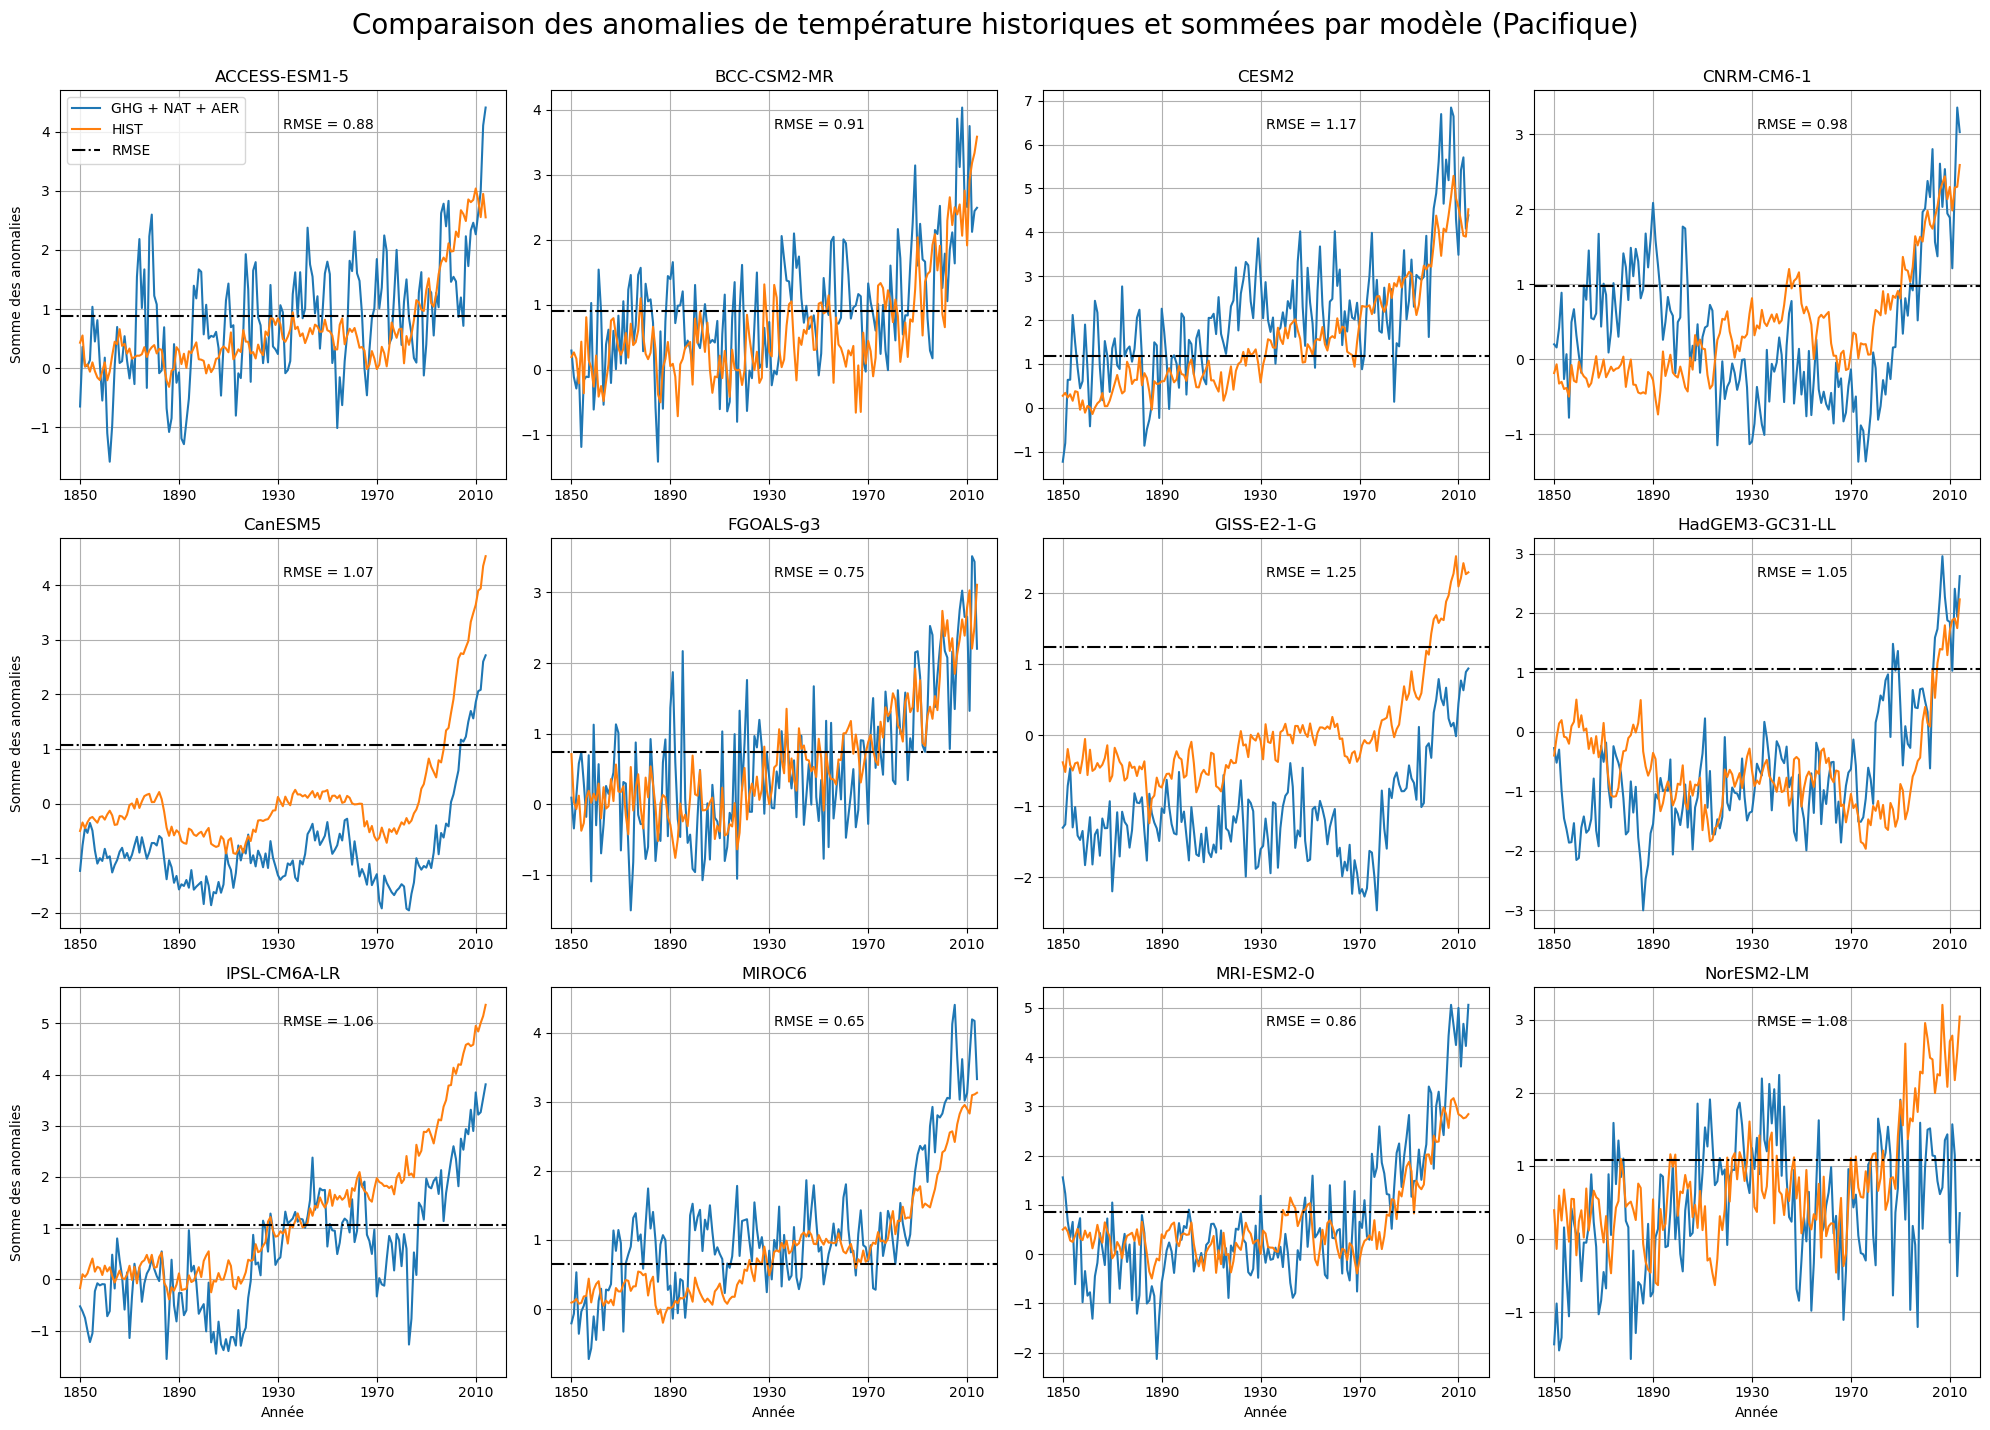

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger le dataset GHG dans un DataFrame
df_GHG = pd.read_csv("hist-GHG_46.csv")
df_mean_GHG = df_GHG.groupby('modele').mean()

# Charger le dataset NAT dans un DataFrame
df_NAT = pd.read_csv("hist-nat_46.csv")
df_mean_NAT = df_NAT.groupby('modele').mean()

# Charger le dataset AER dans un DataFrame
df_AER = pd.read_csv("hist-aer_46.csv")
df_mean_AER = df_AER.groupby('modele').mean()

# Charger le dataset HIST dans un DataFrame
df_HIST = pd.read_csv("historical_46.csv")
df_mean_HIST = df_HIST.groupby('modele').mean()

# Extraire les noms de modèles uniques
modeles = df_GHG['modele'].unique()

# Créer une figure avec une grille 3x4 pour les sous-graphiques
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Parcourir les modèles et tracer les graphiques
for i, modele in enumerate(modeles):
    # Obtenir les anomalies moyennes pour le modèle donné dans chaque dataset
    anomalies_GHG = df_mean_GHG.loc[modele, :].values
    anomalies_NAT = df_mean_NAT.loc[modele, :].values
    anomalies_AER = df_mean_AER.loc[modele, :].values
    anomalies_HIST = df_mean_HIST.loc[modele, :].values
    
    # Calculer la somme des séries temporelles
    anomalies_sum = anomalies_GHG + anomalies_NAT + anomalies_AER
    
    # Calculer les coordonnées du sous-graphique correspondant
    row = i // 4
    col = i % 4
    
    # calculer la RMSE entre les anomalies sommées et les anomalies HIST et l'afficher en courbe
    #rmse_plot = np.sqrt(((anomalies_sum - anomalies_HIST) ** 2))
    rmse = np.sqrt(((anomalies_sum - anomalies_HIST) ** 2).mean())
    
    # Tracer le graphique sur le sous-graphique correspondant
    ax = axes[row, col]
    ax.plot(anomalies_sum, label='GHG + NAT + AER')
    ax.plot(anomalies_HIST, label='HIST')
    #ax.plot(rmse_plot, label='RMSE')
    ax.text(0.5, 0.9, 'RMSE = {:.2f}'.format(rmse), transform=ax.transAxes, fontsize=10)
    # tracer la ligne de rmse de 1900 à 2014
    ax.axhline(y=rmse, color='black', linestyle='-.', label='RMSE')
    ax.grid()

    
    # Ajouter le titre et les divisions des axes pour les sous-graphiques de la première colonne et de la première ligne
    if col == 0:
        ax.set_ylabel('Somme des anomalies')
    if row == 2:
        ax.set_xlabel('Année')
    ax.set_xticks(range(0, len(anomalies_GHG), 40))
    ax.set_xticklabels(range(1850, 2015, 40))
    
    # Ajouter le titre pour le sous-graphique de la première colonne
    axes[row, col].set_title(modele)
        
    # Afficher la légende
    if row == 0 and col == 0:
        ax.legend()
        
# titre de la figure comparaison hist et sum
fig.suptitle('Comparaison des anomalies de température historiques et sommées par modèle (Pacifique)', fontsize=20)
    
# Ajuster les espacements entre les sous-graphiques
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# Afficher la figure
plt.show()

In [5]:
# Construire un test de Student pour comparer les anomalies sommées et les anomalies HIST
from scipy.stats import ttest_ind

# Créer une liste vide pour stocker les p-values
p_values = []

# Parcourir les modèles et calculer les p-values
for modele in modeles:
    anomalies_GHG = df_mean_GHG.loc[modele, :].values
    anomalies_NAT = df_mean_NAT.loc[modele, :].values
    anomalies_AER = df_mean_AER.loc[modele, :].values
    anomalies_HIST = df_mean_HIST.loc[modele, :].values
    
    # Calculer la somme des anomalies
    anomalies_sum = anomalies_GHG + anomalies_NAT + anomalies_AER
    
    # Calculer la p-value
    _, p_value = ttest_ind(anomalies_sum, anomalies_HIST, equal_var=True)
    
    # Ajouter la p-value à la liste
    p_values.append(p_value)
    
# Créer un DataFrame avec les p-values
df_p_values = pd.DataFrame({'modele': modeles, 'p_value': p_values})

# Poser un seuil de 0.05 pour le test de Student
significatif = df_p_values['p_value'] < 0.05

# Afficher en dataframe les modèles significatifs et non significatifs
df_p_values['significatif'] = significatif
df_p_values # Si la valeur est True, le modèle est significatif c'est à dire que les anomalies sommées sont significativement différentes des anomalies HIST

,modele,p_value,significatif
0,ACCESS-ESM1-5,6.237178e-02,False
1,BCC-CSM2-MR,2.019709e-03,True
2,CESM2,3.226733e-05,True
3,CNRM-CM6-1,7.195520e-01,False
4,CanESM5,5.647038e-18,True
5,FGOALS-g3,6.591896e-01,False
6,GISS-E2-1-G,1.986668e-36,True
7,HadGEM3-GC31-LL,5.287520e-01,False
8,IPSL-CM6A-LR,6.031610e-07,True
9,MIROC6,9.739846e-04,True


/tmp/ipykernel_18875/1084372195.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_p_values['modele'], rotation=90)


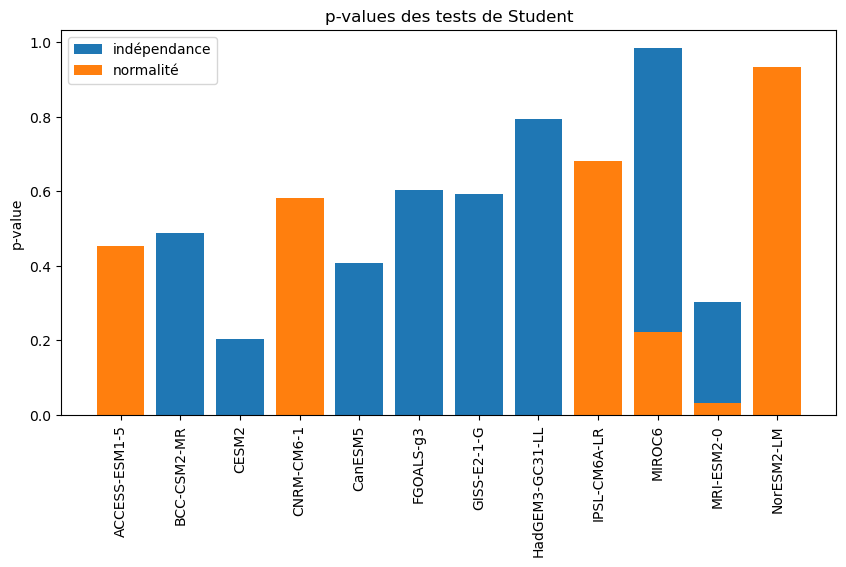

In [12]:
# Vérifier si les deux groupes sont indépendants et suivent une distribution normale
from scipy.stats import normaltest
from scipy.stats import ttest_ind

# Créer une liste vide pour stocker les p-values
p_values = []

# Parcourir les modèles et calculer les p-values
for modele in modeles:
    anomalies_GHG = df_mean_GHG.loc[modele, :].values
    anomalies_NAT = df_mean_NAT.loc[modele, :].values
    anomalies_AER = df_mean_AER.loc[modele, :].values
    anomalies_HIST = df_mean_HIST.loc[modele, :].values
    
    # Calculer la somme des anomalies
    anomalies_sum = anomalies_GHG + anomalies_NAT + anomalies_AER
    
    # Tester l'indépendance des deux groupes
    _, p_value_indep = normaltest(anomalies_sum - anomalies_HIST)
    
    # Tester la normalité des deux groupes
    _, p_value_norm = ttest_ind(anomalies_sum, anomalies_HIST)
    
    # Ajouter la p-value à la liste
    p_values.append((p_value_indep, p_value_norm))
    
# Créer un DataFrame avec les p-values
df_p_values = pd.DataFrame({'modele': modeles, 'p_value_indep': [p[0] for p in p_values], 'p_value_norm': [p[1] for p in p_values]})

# tracer un histogramme des p-values avec les noms des modèles 
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df_p_values['modele'], df_p_values['p_value_indep'], label='indépendance')
ax.bar(df_p_values['modele'], df_p_values['p_value_norm'], label='normalité')
ax.set_xticklabels(df_p_values['modele'], rotation=90)
ax.set_ylabel('p-value')
ax.set_title('p-values des tests de Student')
ax.legend()
plt.show()

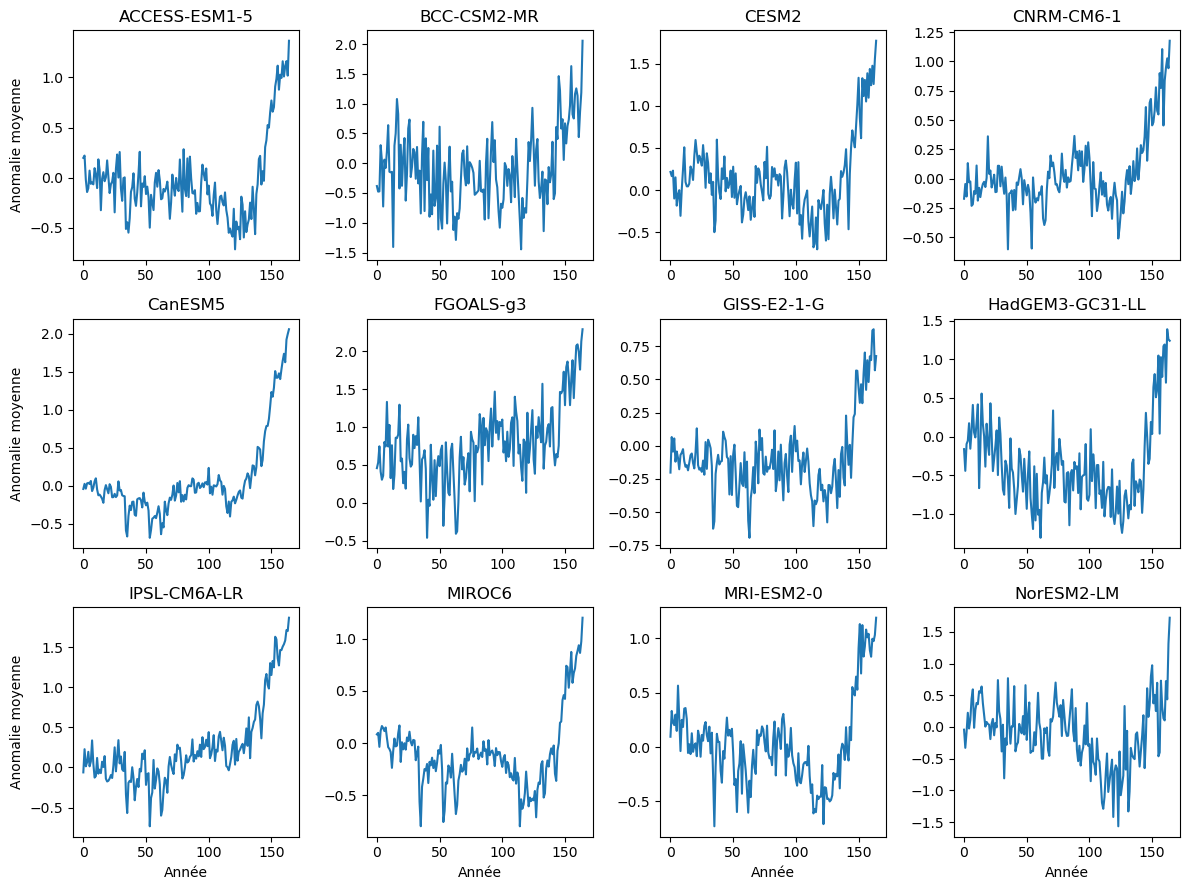

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le dataset dans un DataFrame
df = pd.read_csv("historical_17.csv")

# Calculer la moyenne des anomalies par modèle
df_mean = df.groupby('modele').mean()

# Extraire les noms de modèles uniques
modeles = df['modele'].unique()

# Créer une figure avec une grille 3x4 pour les sous-graphiques
fig, axes = plt.subplots(3, 4, figsize=(12, 9))

# Parcourir les modèles et tracer les graphiques
for i, modele in enumerate(modeles):
    # Obtenir les anomalies moyennes pour le modèle donné
    anomalies = df_mean.loc[modele, :].values
    
    # Calculer les coordonnées du sous-graphique correspondant
    row = i // 4
    col = i % 4
    
    # Tracer le graphique sur le sous-graphique correspondant
    ax = axes[row, col]
    ax.plot(anomalies)
    
    # Ajouter le titre et les divisions des axes pour les sous-graphiques de la première colonne et de la première ligne
    if col == 0:
        ax.set_ylabel('Anomalie moyenne')
    if row == 2:
        ax.set_xlabel('Année')
    
    # Ajouter le titre pour le sous-graphique de la première colonne
    axes[row, col].set_title(modele)

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

In [37]:
# ouvrir un fichier csv 
import pandas as pd
import numpy as np

path = "/.autofs/home/habbar/Bureau/data_nc/hist-aer_17.csv"
df = pd.read_csv(path)

# sélectionner de la colonne 1 à la colonne 3
df = df.iloc[:3, 0:]

# calculer la moyenne de toutes les moyennes
df.mean(axis=1).mean()

-0.7334175891347448

In [38]:
import pandas as pd
import pickle

path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/All_sim_z17v0.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    All_sim = pickle.load(f)
# ce fichier est un numpy.ndarray 
print(f"All_sim : {All_sim}")
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')


path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/forcings_z17v0.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    forcings = pickle.load(f)
# ce fichier est un numpy.ndarray 
print(f"forcings : {forcings}")
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')


path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/models_z17v0.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    models = pickle.load(f)
# ce fichier est un numpy.ndarray
print(f"models : {models}")
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')


path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/T_hist_z17v0.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    T_hist = pickle.load(f)
# ce fichier est un numpy.ndarray
print(f"T_hist : {T_hist}")
print(f"shape T_hist : {T_hist.shape}")
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')


path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/T_nat_z17v0.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    T_nat = pickle.load(f)
# ce fichier est un numpy.ndarray
print(f"T_nat : {T_nat}")
print(f"shape T_nat : {T_nat.shape}")
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')


path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/T_ghg_z17v0.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    T_ghg = pickle.load(f)
# ce fichier est un numpy.ndarray
print(f"T_ghg : {T_ghg}")
print(f"shape T_ghg : {T_ghg.shape}")
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')


path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/T_aer_z17v0.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    T_aer = pickle.load(f)
# ce fichier est un numpy.ndarray
print(f"T_aer : {T_aer}")
print(f"shape T_aer : {T_aer.shape}")
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

All_sim : [[ 3  3  3  8 50  3 10  4  8  3  5  3]
 [ 3  3  2  8 30  3 10  4  8 10  5  3]
 [ 3  3  3  8 50  3 20  4  8 50  5  3]
 [15  3 11 28 65  6 28  5 31 50 11  3]]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
forcings : ['GHG', 'AER', 'NAT', 'HIST']
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
models : ['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0', 'NorESM2-LM']
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
T_hist : [[ 5.57330626e-02 -4.42171819e-01  5.74464383e-01 ... 

### Entraiment

In [39]:
path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/train-nat_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    train_nat = pickle.load(f)

# ouverture en dataframe pandas
df = pd.DataFrame(train_nat)
df = df.T
print(df)                       # 1000 combinaisons pour chaque modèle

               0              1              2              3      \
model  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5   
1850        0.378666       0.378666       0.378666       0.378666   
1851        0.096543       0.096543       0.096543       0.096543   
1852        1.576058       1.576058       1.576058       1.576058   
1853        0.326823       0.326823       0.326823       0.326823   
...              ...            ...            ...            ...   
2010        -0.85459       -0.85459       -0.85459       -0.85459   
2011       -0.693404      -0.693404      -0.693404      -0.693404   
2012        0.006621       0.006621       0.006621       0.006621   
2013       -1.304621      -1.304621      -1.304621      -1.304621   
2014        1.055413       1.055413       1.055413       1.055413   

               4              5              6              7      \
model  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5   
1850        0.830121       0.3786

In [40]:
path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/train-aer_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    train_aer = pickle.load(f)

# ouverture en dataframe pandas
df = pd.DataFrame(train_aer)
df = df.T
print(df)                       # 1000 combinaisons pour chaque modèle

               0              1              2              3      \
model  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5   
1850       -0.799411      -0.799411      -0.799411      -0.584722   
1851       -0.777932      -0.777932      -0.777932      -0.015025   
1852       -1.078398      -1.078398      -1.078398        0.17019   
1853        0.132827       0.132827       0.132827       0.229476   
...              ...            ...            ...            ...   
2010       -1.278702      -1.278702      -1.278702      -1.034955   
2011       -1.625587      -1.625587      -1.625587      -0.744853   
2012       -1.074487      -1.074487      -1.074487      -0.603275   
2013       -0.042169      -0.042169      -0.042169      -0.936907   
2014       -0.159831      -0.159831      -0.159831      -0.860315   

               4              5              6              7      \
model  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5   
1850       -0.799411       0.5266

In [41]:
path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/train-ghg_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    train_ghg = pickle.load(f)

# ouverture en dataframe pandas
df = pd.DataFrame(train_ghg)
df = df.T
print(df)                       # 1000 combinaisons pour chaque modèle

               0              1              2              3      \
model  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5   
1850        -0.89073      -0.798205      -0.070414      -0.070414   
1851       -0.185708      -0.762137       0.909948       0.909948   
1852        0.151511       1.205322      -0.132748      -0.132748   
1853        -1.80803       -0.50454      -1.092791      -1.092791   
...              ...            ...            ...            ...   
2010        1.948404       1.888584       1.908507       1.908507   
2011        2.137798       1.484526       1.581271       1.581271   
2012        2.115355       2.554421       1.746392       1.746392   
2013        1.145627       1.230672       2.092418       2.092418   
2014        2.315021       1.669958       1.553889       1.553889   

               4              5              6              7      \
model  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5   
1850       -0.798205       -0.890

In [42]:
path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/train-hist_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    train_hist = pickle.load(f)

# ouverture en dataframe pandas
df = pd.DataFrame(train_hist)
df = df.T
print(df)                       # 1000 combinaisons pour chaque modèle

               0              1              2              3      \
model  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5   
1850        0.601786       0.548474      -0.310374       0.134248   
1851        0.505126       1.146361       0.469808        0.29421   
1852       -0.496597       0.823825      -0.431458       0.311192   
1853        0.237542       0.518304       0.300585      -0.259814   
...              ...            ...            ...            ...   
2010        0.938989       1.752665       1.378895        1.28728   
2011        1.549593       2.397556       1.419171       1.113347   
2012        1.105648       0.439045       2.176774        0.55871   
2013        0.707274       0.698542       2.425139       0.951331   
2014        1.770161       1.019065       2.602044       1.768116   

               4              5              6              7      \
model  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5  ACCESS-ESM1-5   
1850        0.601786       0.0557

In [43]:
path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/train-combi-dic_TTDGM2-S0-GAN85pc-N1000_z17v0.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    train_combi = pickle.load(f)

# les clés du dictionnaire et print de chaque clé
print(f'Les clés sont: {train_combi.keys()}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'Index est: {train_combi["index"]}')
print(f'Shape de Index est: {train_combi["index"].shape}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'n_by_mod est: {train_combi["n_by_mod"]}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'models est: {train_combi["models"]}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'forcings est: {train_combi["forcings"]}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'years est: {train_combi["years"]}')

Les clés sont: dict_keys(['index', 'n_by_mod', 'models', 'forcings', 'years'])
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Index est: [[  0   0   1   1]
 [  1   0   1   8]
 [  2   0   1   9]
 ...
 [101  88 158 254]
 [101  86 158 255]
 [102  88 158 255]]
Shape de Index est: (12000, 4)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
n_by_mod est: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
models est: ['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', 'HadGEM3-GC31

### Test

In [44]:
path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/test-nat_TTDGM2-S0-GAN15pc-NMx1000_z17v0_df.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    test_nat = pickle.load(f)
    
# ouverture en dataframe pandas
df = pd.DataFrame(test_nat)
df          

,model,1850,1851,1852,1853,1854,1855,1856,1857,1858,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,ACCESS-ESM1-5,0.830121,0.079378,-0.365697,-0.088735,-0.346742,0.777556,0.051285,-0.730453,-0.491226,...,0.332501,-0.432470,-1.28282,-0.499817,0.310366,-0.563430,-0.010646,1.062173,0.434735,-0.518596
1,ACCESS-ESM1-5,0.830121,0.079378,-0.365697,-0.088735,-0.346742,0.777556,0.051285,-0.730453,-0.491226,...,0.332501,-0.432470,-1.28282,-0.499817,0.310366,-0.563430,-0.010646,1.062173,0.434735,-0.518596
2,ACCESS-ESM1-5,0.830121,0.079378,-0.365697,-0.088735,-0.346742,0.777556,0.051285,-0.730453,-0.491226,...,0.332501,-0.432470,-1.28282,-0.499817,0.310366,-0.563430,-0.010646,1.062173,0.434735,-0.518596
3,ACCESS-ESM1-5,0.830121,0.079378,-0.365697,-0.088735,-0.346742,0.777556,0.051285,-0.730453,-0.491226,...,0.332501,-0.432470,-1.28282,-0.499817,0.310366,-0.563430,-0.010646,1.062173,0.434735,-0.518596
4,ACCESS-ESM1-5,0.830121,0.079378,-0.365697,-0.088735,-0.346742,0.777556,0.051285,-0.730453,-0.491226,...,0.332501,-0.432470,-1.28282,-0.499817,0.310366,-0.563430,-0.010646,1.062173,0.434735,-0.518596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,NorESM2-LM,0.299346,-0.099335,-0.081730,-0.297892,-0.135487,-0.763219,0.304579,-0.384774,0.035670,...,0.639065,-0.143912,0.74270,-0.034515,0.323475,-0.177929,0.193268,-0.096454,-0.622906,0.177522
1727,NorESM2-LM,0.299346,-0.099335,-0.081730,-0.297892,-0.135487,-0.763219,0.304579,-0.384774,0.035670,...,0.639065,-0.143912,0.74270,-0.034515,0.323475,-0.177929,0.193268,-0.096454,-0.622906,0.177522
1728,NorESM2-LM,0.299346,-0.099335,-0.081730,-0.297892,-0.135487,-0.763219,0.304579,-0.384774,0.035670,...,0.639065,-0.143912,0.74270,-0.034515,0.323475,-0.177929,0.193268,-0.096454,-0.622906,0.177522
1729,NorESM2-LM,0.299346,-0.099335,-0.081730,-0.297892,-0.135487,-0.763219,0.304579,-0.384774,0.035670,...,0.639065,-0.143912,0.74270,-0.034515,0.323475,-0.177929,0.193268,-0.096454,-0.622906,0.177522


In [45]:
path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/test-aer_TTDGM2-S0-GAN15pc-NMx1000_z17v0_df.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    test_aer = pickle.load(f)
    
# ouverture en dataframe pandas
df = pd.DataFrame(test_aer)
df          

,model,1850,1851,1852,1853,1854,1855,1856,1857,1858,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,ACCESS-ESM1-5,0.526621,-0.033313,-0.642813,0.258223,-0.027608,0.361578,0.680096,-0.040082,-0.834439,...,-0.818742,-1.466293,-0.696421,-1.633102,-1.173688,0.351688,-1.059795,0.250638,-1.115099,-0.443628
1,ACCESS-ESM1-5,-0.799411,-0.777932,-1.078398,0.132827,-1.312122,0.157479,0.309952,-1.189281,0.522610,...,-1.059881,-0.887268,-0.469203,-1.630039,-0.874770,-1.278702,-1.625587,-1.074487,-0.042169,-0.159831
2,ACCESS-ESM1-5,0.526621,-0.033313,-0.642813,0.258223,-0.027608,0.361578,0.680096,-0.040082,-0.834439,...,-0.818742,-1.466293,-0.696421,-1.633102,-1.173688,0.351688,-1.059795,0.250638,-1.115099,-0.443628
3,ACCESS-ESM1-5,-0.584722,-0.015025,0.170190,0.229476,-0.700613,0.566379,-0.308285,-0.552223,-0.021881,...,-0.677125,-2.107798,-1.566337,-0.401618,-1.738684,-1.034955,-0.744853,-0.603275,-0.936907,-0.860315
4,ACCESS-ESM1-5,0.526621,-0.033313,-0.642813,0.258223,-0.027608,0.361578,0.680096,-0.040082,-0.834439,...,-0.818742,-1.466293,-0.696421,-1.633102,-1.173688,0.351688,-1.059795,0.250638,-1.115099,-0.443628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,NorESM2-LM,-0.380236,-0.199307,0.487855,-0.688501,-0.291494,0.177420,0.322106,-0.064185,-0.271215,...,-1.101070,-2.224190,-1.029407,-1.088932,-1.596926,-1.445488,-2.476718,-1.021967,-1.388335,-1.726257
1727,NorESM2-LM,0.639770,0.189205,1.114506,1.299481,-0.198358,0.240811,1.653759,1.265301,0.416781,...,-2.340295,-1.308059,-2.183054,-1.530946,-2.898540,-1.720491,-0.973597,-1.502152,-1.011711,-0.981573
1728,NorESM2-LM,-0.380236,-0.199307,0.487855,-0.688501,-0.291494,0.177420,0.322106,-0.064185,-0.271215,...,-1.101070,-2.224190,-1.029407,-1.088932,-1.596926,-1.445488,-2.476718,-1.021967,-1.388335,-1.726257
1729,NorESM2-LM,-0.439673,0.795890,-0.065900,0.691232,0.192329,-0.190249,-0.445786,1.434169,0.197183,...,-1.927819,-2.083951,-1.077959,-1.217905,-1.219070,-1.140634,-0.222899,-1.233891,-2.638958,-1.541617


In [46]:
path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/test-ghg_TTDGM2-S0-GAN15pc-NMx1000_z17v0_df.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    test_ghg = pickle.load(f)
    
# ouverture en dataframe pandas
df = pd.DataFrame(test_ghg)
df          

,model,1850,1851,1852,1853,1854,1855,1856,1857,1858,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,ACCESS-ESM1-5,-0.890730,-0.185708,0.151511,-1.808030,-0.254455,-0.305464,-0.097872,-0.405693,-0.650359,...,2.179655,2.616795,1.051241,2.998411,0.665481,1.948404,2.137798,2.115355,1.145627,2.315021
1,ACCESS-ESM1-5,-0.890730,-0.185708,0.151511,-1.808030,-0.254455,-0.305464,-0.097872,-0.405693,-0.650359,...,2.179655,2.616795,1.051241,2.998411,0.665481,1.948404,2.137798,2.115355,1.145627,2.315021
2,ACCESS-ESM1-5,-0.070414,0.909948,-0.132748,-1.092791,-0.407363,-1.283088,-1.102075,-1.326199,-0.899411,...,2.754341,1.572773,1.489474,1.706247,1.676174,1.908507,1.581271,1.746392,2.092418,1.553889
3,ACCESS-ESM1-5,-0.798205,-0.762137,1.205322,-0.504540,-0.930353,-0.325261,-0.973762,-0.695398,0.262346,...,2.570548,2.344749,2.280769,1.906171,2.573771,1.888584,1.484526,2.554421,1.230672,1.669958
4,ACCESS-ESM1-5,-0.798205,-0.762137,1.205322,-0.504540,-0.930353,-0.325261,-0.973762,-0.695398,0.262346,...,2.570548,2.344749,2.280769,1.906171,2.573771,1.888584,1.484526,2.554421,1.230672,1.669958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,NorESM2-LM,0.442415,0.262703,0.232307,-1.009595,0.606105,0.403525,0.470375,-0.147158,0.100849,...,1.767805,1.714825,1.126034,0.730765,0.685909,0.825729,0.940168,0.115915,0.610674,0.521692
1727,NorESM2-LM,0.442415,0.262703,0.232307,-1.009595,0.606105,0.403525,0.470375,-0.147158,0.100849,...,1.767805,1.714825,1.126034,0.730765,0.685909,0.825729,0.940168,0.115915,0.610674,0.521692
1728,NorESM2-LM,-0.594057,-0.194239,0.140831,-0.709343,-0.444913,-0.027493,-0.835004,0.178788,-0.294745,...,1.267246,1.687182,1.483028,1.095657,1.733908,1.702060,0.663313,0.269262,1.043123,1.241686
1729,NorESM2-LM,0.291053,1.072641,1.312943,0.421058,0.466235,-0.536826,0.592358,1.211577,0.519147,...,1.660873,1.189685,1.423778,1.070606,1.143584,0.926265,1.642138,2.327317,1.884647,0.984160


In [47]:
path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/test-hist_TTDGM2-S0-GAN15pc-NMx1000_z17v0_df.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    test_hist = pickle.load(f)
    
# ouverture en dataframe pandas
df = pd.DataFrame(test_hist)
df      

,model,1850,1851,1852,1853,1854,1855,1856,1857,1858,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,ACCESS-ESM1-5,-0.236235,0.627136,0.077675,-0.209922,0.208843,0.095796,0.287838,0.399496,0.775657,...,1.101300,1.149411,1.295770,2.184900,1.343935,1.460717,0.923046,0.799920,1.753846,1.172953
1,ACCESS-ESM1-5,0.548474,1.146361,0.823825,0.518304,-0.362601,0.815279,-0.473810,-1.071883,-0.259505,...,1.190692,2.110014,1.004192,0.391657,1.549159,1.752665,2.397556,0.439045,0.698542,1.019065
2,ACCESS-ESM1-5,0.601786,0.505126,-0.496597,0.237542,-0.594033,0.294847,-0.955828,-0.182447,-0.881407,...,1.995800,0.909917,0.984134,0.823667,1.096712,0.938989,1.549593,1.105648,0.707274,1.770161
3,ACCESS-ESM1-5,1.184520,0.557719,0.273558,-0.810643,-0.010221,-0.200429,-1.481853,-0.739332,-1.405142,...,1.396896,0.602949,1.528531,1.626374,1.909320,1.577904,1.018461,1.130284,1.257793,1.532548
4,ACCESS-ESM1-5,-0.376833,-0.396642,-0.227511,0.739234,-0.491448,0.704763,-0.355570,0.012925,0.403805,...,0.787924,0.094198,0.717320,1.152289,0.644070,0.263927,1.913005,0.656886,0.526058,1.341105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,NorESM2-LM,-0.682709,-0.063991,0.017432,1.135820,-0.341227,0.241785,-0.076730,0.529112,-0.811938,...,-0.073985,0.737965,1.397683,1.531309,-0.101620,1.140308,1.709888,0.588456,1.373680,2.257385
1727,NorESM2-LM,0.553484,-0.789455,1.111549,0.000742,0.408174,-0.142882,1.184768,0.519876,0.303199,...,0.236396,0.151897,0.361275,-0.529370,0.333802,-0.530524,-0.168112,0.719393,1.465843,1.417198
1728,NorESM2-LM,0.553484,-0.789455,1.111549,0.000742,0.408174,-0.142882,1.184768,0.519876,0.303199,...,0.236396,0.151897,0.361275,-0.529370,0.333802,-0.530524,-0.168112,0.719393,1.465843,1.417198
1729,NorESM2-LM,-0.682709,-0.063991,0.017432,1.135820,-0.341227,0.241785,-0.076730,0.529112,-0.811938,...,-0.073985,0.737965,1.397683,1.531309,-0.101620,1.140308,1.709888,0.588456,1.373680,2.257385


In [48]:
path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/test-combi-dic_TTDGM2-S0-GAN15pc-NMx1000_z17v0.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    test_combi = pickle.load(f)

# les clés du dictionnaire et print de chaque clé
print(f'Les clés sont: {test_combi.keys()}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'Index est: {test_combi["index"]}')
print(f'Shape de Index est: {test_combi["index"].shape}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'n_by_mod est: {test_combi["n_by_mod"]}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'models est: {test_combi["models"]}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'forcings est: {test_combi["forcings"]}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'years est: {test_combi["years"]}')

Les clés sont: dict_keys(['index', 'n_by_mod', 'models', 'forcings', 'years'])
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Index est: [[  0   1   0  11]
 [  0   0   0   8]
 [  2   1   0   1]
 ...
 [102  87 157 254]
 [101  88 157 253]
 [101  87 157 255]]
Shape de Index est: (1731, 4)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
n_by_mod est: [5, 5, 3, 77, 1000, 5, 300, 10, 77, 225, 19, 5]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
models est: ['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIR

### Inversion

In [49]:
path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/inversion-aer_INVDGM1-S1-NMx100_z17v0_df.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    inv_aer = pickle.load(f)
    
# ouverture en dataframe pandas
df = pd.DataFrame(inv_aer)
df

,model,1850,1851,1852,1853,1854,1855,1856,1857,1858,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,ACCESS-ESM1-5,-0.799411,-0.777932,-1.078398,0.132827,-1.312122,0.157479,0.309952,-1.189281,0.522610,...,-1.059881,-0.887268,-0.469203,-1.630039,-0.874770,-1.278702,-1.625587,-1.074487,-0.042169,-0.159831
1,ACCESS-ESM1-5,-0.799411,-0.777932,-1.078398,0.132827,-1.312122,0.157479,0.309952,-1.189281,0.522610,...,-1.059881,-0.887268,-0.469203,-1.630039,-0.874770,-1.278702,-1.625587,-1.074487,-0.042169,-0.159831
2,ACCESS-ESM1-5,-0.799411,-0.777932,-1.078398,0.132827,-1.312122,0.157479,0.309952,-1.189281,0.522610,...,-1.059881,-0.887268,-0.469203,-1.630039,-0.874770,-1.278702,-1.625587,-1.074487,-0.042169,-0.159831
3,ACCESS-ESM1-5,0.526621,-0.033313,-0.642813,0.258223,-0.027608,0.361578,0.680096,-0.040082,-0.834439,...,-0.818742,-1.466293,-0.696421,-1.633102,-1.173688,0.351688,-1.059795,0.250638,-1.115099,-0.443628
4,ACCESS-ESM1-5,0.526621,-0.033313,-0.642813,0.258223,-0.027608,0.361578,0.680096,-0.040082,-0.834439,...,-0.818742,-1.466293,-0.696421,-1.633102,-1.173688,0.351688,-1.059795,0.250638,-1.115099,-0.443628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,NorESM2-LM,-0.380236,-0.199307,0.487855,-0.688501,-0.291494,0.177420,0.322106,-0.064185,-0.271215,...,-1.101070,-2.224190,-1.029407,-1.088932,-1.596926,-1.445488,-2.476718,-1.021967,-1.388335,-1.726257
786,NorESM2-LM,-0.380236,-0.199307,0.487855,-0.688501,-0.291494,0.177420,0.322106,-0.064185,-0.271215,...,-1.101070,-2.224190,-1.029407,-1.088932,-1.596926,-1.445488,-2.476718,-1.021967,-1.388335,-1.726257
787,NorESM2-LM,-0.439673,0.795890,-0.065900,0.691232,0.192329,-0.190249,-0.445786,1.434169,0.197183,...,-1.927819,-2.083951,-1.077959,-1.217905,-1.219070,-1.140634,-0.222899,-1.233891,-2.638958,-1.541617
788,NorESM2-LM,-0.439673,0.795890,-0.065900,0.691232,0.192329,-0.190249,-0.445786,1.434169,0.197183,...,-1.927819,-2.083951,-1.077959,-1.217905,-1.219070,-1.140634,-0.222899,-1.233891,-2.638958,-1.541617


In [50]:
path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/inversion-ghg_INVDGM1-S1-NMx100_z17v0_df.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    inv_ghg = pickle.load(f)
    
# ouverture en dataframe pandas
df = pd.DataFrame(inv_ghg)
df

,model,1850,1851,1852,1853,1854,1855,1856,1857,1858,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,ACCESS-ESM1-5,-0.890730,-0.185708,0.151511,-1.808030,-0.254455,-0.305464,-0.097872,-0.405693,-0.650359,...,2.179655,2.616795,1.051241,2.998411,0.665481,1.948404,2.137798,2.115355,1.145627,2.315021
1,ACCESS-ESM1-5,-0.890730,-0.185708,0.151511,-1.808030,-0.254455,-0.305464,-0.097872,-0.405693,-0.650359,...,2.179655,2.616795,1.051241,2.998411,0.665481,1.948404,2.137798,2.115355,1.145627,2.315021
2,ACCESS-ESM1-5,-0.890730,-0.185708,0.151511,-1.808030,-0.254455,-0.305464,-0.097872,-0.405693,-0.650359,...,2.179655,2.616795,1.051241,2.998411,0.665481,1.948404,2.137798,2.115355,1.145627,2.315021
3,ACCESS-ESM1-5,-0.890730,-0.185708,0.151511,-1.808030,-0.254455,-0.305464,-0.097872,-0.405693,-0.650359,...,2.179655,2.616795,1.051241,2.998411,0.665481,1.948404,2.137798,2.115355,1.145627,2.315021
4,ACCESS-ESM1-5,-0.890730,-0.185708,0.151511,-1.808030,-0.254455,-0.305464,-0.097872,-0.405693,-0.650359,...,2.179655,2.616795,1.051241,2.998411,0.665481,1.948404,2.137798,2.115355,1.145627,2.315021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,NorESM2-LM,-0.594057,-0.194239,0.140831,-0.709343,-0.444913,-0.027493,-0.835004,0.178788,-0.294745,...,1.267246,1.687182,1.483028,1.095657,1.733908,1.702060,0.663313,0.269262,1.043123,1.241686
786,NorESM2-LM,-0.594057,-0.194239,0.140831,-0.709343,-0.444913,-0.027493,-0.835004,0.178788,-0.294745,...,1.267246,1.687182,1.483028,1.095657,1.733908,1.702060,0.663313,0.269262,1.043123,1.241686
787,NorESM2-LM,-0.594057,-0.194239,0.140831,-0.709343,-0.444913,-0.027493,-0.835004,0.178788,-0.294745,...,1.267246,1.687182,1.483028,1.095657,1.733908,1.702060,0.663313,0.269262,1.043123,1.241686
788,NorESM2-LM,-0.594057,-0.194239,0.140831,-0.709343,-0.444913,-0.027493,-0.835004,0.178788,-0.294745,...,1.267246,1.687182,1.483028,1.095657,1.733908,1.702060,0.663313,0.269262,1.043123,1.241686


In [51]:
path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/inversion-nat_INVDGM1-S1-NMx100_z17v0_df.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    inv_nat = pickle.load(f)
    
# ouverture en dataframe pandas
df = pd.DataFrame(inv_nat)
df

,model,1850,1851,1852,1853,1854,1855,1856,1857,1858,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,ACCESS-ESM1-5,0.830121,0.079378,-0.365697,-0.088735,-0.346742,0.777556,0.051285,-0.730453,-0.491226,...,0.332501,-0.432470,-1.282820,-0.499817,0.310366,-0.563430,-0.010646,1.062173,0.434735,-0.518596
1,ACCESS-ESM1-5,0.378666,0.096543,1.576058,0.326823,1.014741,0.645563,0.475288,-1.020350,-1.282284,...,0.753328,-0.041268,-0.161241,0.370180,-0.131887,-0.854590,-0.693404,0.006621,-1.304621,1.055413
2,ACCESS-ESM1-5,-0.393861,0.780993,0.086504,-0.838203,-0.101394,-0.149236,0.544655,0.154670,0.635717,...,1.816269,0.623475,0.129618,0.445558,0.815242,0.067389,1.028418,-0.060584,1.000628,1.578675
3,ACCESS-ESM1-5,0.830121,0.079378,-0.365697,-0.088735,-0.346742,0.777556,0.051285,-0.730453,-0.491226,...,0.332501,-0.432470,-1.282820,-0.499817,0.310366,-0.563430,-0.010646,1.062173,0.434735,-0.518596
4,ACCESS-ESM1-5,0.378666,0.096543,1.576058,0.326823,1.014741,0.645563,0.475288,-1.020350,-1.282284,...,0.753328,-0.041268,-0.161241,0.370180,-0.131887,-0.854590,-0.693404,0.006621,-1.304621,1.055413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,NorESM2-LM,-0.509275,-0.076167,0.146041,0.592420,0.736938,0.593884,0.286283,0.414491,0.468475,...,-0.017825,0.578188,-0.611032,-0.097284,0.121295,-0.217752,-0.687418,0.048483,0.572136,-0.059637
786,NorESM2-LM,0.312593,-0.438391,-0.153892,-0.118223,-0.722073,-0.722478,-0.308269,-0.034816,0.718298,...,0.392417,1.165081,1.418985,0.254790,0.183305,0.855545,0.703397,0.966709,-0.435572,0.018665
787,NorESM2-LM,0.299346,-0.099335,-0.081730,-0.297892,-0.135487,-0.763219,0.304579,-0.384774,0.035670,...,0.639065,-0.143912,0.742700,-0.034515,0.323475,-0.177929,0.193268,-0.096454,-0.622906,0.177522
788,NorESM2-LM,-0.509275,-0.076167,0.146041,0.592420,0.736938,0.593884,0.286283,0.414491,0.468475,...,-0.017825,0.578188,-0.611032,-0.097284,0.121295,-0.217752,-0.687418,0.048483,0.572136,-0.059637


In [52]:
path = "/.autofs/home/habbar/Bureau/data_nc/stagelong/projetlong/data_source_dr/Region17/inversion-combi-dic_INVDGM1-S1-NMx100_z17v0.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    test_combi = pickle.load(f)

# les clés du dictionnaire et print de chaque clé
print(f'Les clés sont: {test_combi.keys()}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'Index est: {test_combi["index"]}')
print(f'Shape de Index est: {test_combi["index"].shape}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'n_by_mod est: {test_combi["n_by_mod"]}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'models est: {test_combi["models"]}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'forcings est: {test_combi["forcings"]}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'years est: {test_combi["years"]}')

Les clés sont: dict_keys(['index', 'n_by_mod', 'models', 'forcings', 'years'])
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Index est: [[  0   0   0]
 [  0   0   1]
 [  0   0   2]
 ...
 [102  88 157]
 [102  88 158]
 [102  88 159]]
Shape de Index est: (790, 3)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
n_by_mod est: [27, 27, 18, 100, 100, 27, 100, 64, 100, 100, 100, 27]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
models est: ['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0'

In [6]:
path_hist = "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-hist_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p"
import pickle

# lire ce fichier .p 
def pickle_loader(pickle_file):
    with open(pickle_file, 'rb') as file:
        data = pickle.load(file)
    return data

pkl_hist = pickle_loader(path_hist)
print(pkl_hist)

               model      1850      1851      1852      1853      1854  \
0      ACCESS-ESM1-5  0.378666  0.096543  1.576058  0.326823  1.014741   
1      ACCESS-ESM1-5  0.378666  0.096543  1.576058  0.326823  1.014741   
2      ACCESS-ESM1-5  0.378666  0.096543  1.576058  0.326823  1.014741   
3      ACCESS-ESM1-5  0.378666  0.096543  1.576058  0.326823  1.014741   
4      ACCESS-ESM1-5  0.830121  0.079378 -0.365697 -0.088735 -0.346742   
...              ...       ...       ...       ...       ...       ...   
11995     NorESM2-LM  0.312593 -0.438391 -0.153892 -0.118223 -0.722073   
11996     NorESM2-LM -0.509275 -0.076167  0.146041  0.592420  0.736938   
11997     NorESM2-LM -0.509275 -0.076167  0.146041  0.592420  0.736938   
11998     NorESM2-LM -0.509275 -0.076167  0.146041  0.592420  0.736938   
11999     NorESM2-LM -0.509275 -0.076167  0.146041  0.592420  0.736938   

           1855      1856      1857      1858  ...      2005      2006  \
0      0.645563  0.475288 -1.020350 -

In [ ]:
# afficher les valeurs de chaque clé
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'Index est: {pkl["Xinv"]}')
print(f'len de Index est: {len(pkl["Xinv"])}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'n_by_mod est: {pkl["Yinv"]}')
print(f'len de n_by_mod est: {len(pkl["Yinv"])}')
print('---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print(f'models est: {pkl["forc_xinv_index"]}')import numpy as np
from scipy import signal
'''
# Define the high-pass filter parameters
order = 3
cutoff = 0.1
fs = 1.0

# Apply high-pass filter to Xinv
sos = signal.butter(order, cutoff, btype='high', fs=fs, output='sos')
Xinv_filtered = signal.sosfilt(sos, pkl['Xinv'], axis=1)

# Apply high-pass filter to Yinv
Yinv_filtered = signal.sosfilt(sos, pkl['Yinv'], axis=1)

#print(pkl['Xinv'].shape)
print('------------------------------------------------------------------------------------------------------------')
print(Yinv_filtered.shape)

print(np.array(pkl['Xinv']).shape)
'''

#Lissage 
filt_dic={ 'n':4, 'Wn':[1./10.], 'btype':'lowpass'}
b_lp_filter, a_lp_filter = gt.filtering_forcing_signal_f(filt_dic, verbose=False)

print(np.array(pkl['Xinv']).shape)
print(np.array(pkl['Yinv']).shape)
Xinv_filt = signal.filtfilt(b_lp_filter, a_lp_filter, pkl['Xinv'], axis=4)
print(Xinv_filt.shape)
Yinv_filt = signal.filtfilt(b_lp_filter, a_lp_filter, pkl['Yinv'], axis=3)
print(Yinv_filt.shape)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Index est: [array([[[[ 3.08646858e-01, -1.64822564e-01,  6.80421472e-01, ...,
           4.58611822e+00,  4.25381422e+00,  4.60828686e+00],
         [-1.69089794e-01, -2.56549627e-01, -2.49487385e-01, ...,
          -1.53709543e+00, -1.94918382e+00, -1.83908927e+00],
         [ 7.12305456e-02, -7.87344873e-02, -9.42853242e-02, ...,
           5.36993563e-01,  3.88487652e-02,  2.13744149e-01]]],


       [[[ 3.13363999e-01, -6.10173866e-02,  1.16736218e-01, ...,
           4.85541344e+00,  4.28081942e+00,  4.59091139e+00],
         [-2.51156658e-01, -3.61741960e-01, -1.92470789e-01, ...,
          -1.51941168e+00, -1.54205084e+00, -1.86759484e+00],
         [ 1.04344077e-02, -3.17846596e-01,  9.12013650e-02, ...,
           8.34913775e-02,  7.37263262e-01,  1.72834396e-01]]],


       [[[ 3.74845117e-01, -

In [ ]:
import numpy as np
from scipy import signal
import generic_tools_pl as gt
'''
# Define the high-pass filter parameters
order = 3
cutoff = 0.1
fs = 1.0

# Apply high-pass filter to Xinv
sos = signal.butter(order, cutoff, btype='high', fs=fs, output='sos')
Xinv_filtered = signal.sosfilt(sos, pkl['Xinv'], axis=1)

# Apply high-pass filter to Yinv
Yinv_filtered = signal.sosfilt(sos, pkl['Yinv'], axis=1)

#print(pkl['Xinv'].shape)
print('------------------------------------------------------------------------------------------------------------')
print(Yinv_filtered.shape)

print(np.array(pkl['Xinv']).shape)
'''

#Lissage 
filt_dic={ 'n':4, 'Wn':[1./10.], 'btype':'lowpass'}
b_lp_filter, a_lp_filter = gt.filtering_forcing_signal_f(filt_dic, verbose=False)

print(np.array(pkl['Xinv']).shape)
print(np.array(pkl['Yinv']).shape)
Xinv_filt = signal.filtfilt(b_lp_filter, a_lp_filter, pkl['Xinv'], axis=4)
print(Xinv_filt.shape)
Yinv_filt = signal.filtfilt(b_lp_filter, a_lp_filter, pkl['Yinv'], axis=3)
print(Yinv_filt.shape)

(1, 600, 1, 3, 133)
(1, 600, 1, 115)
(1, 600, 1, 3, 133)
(1, 600, 1, 115)


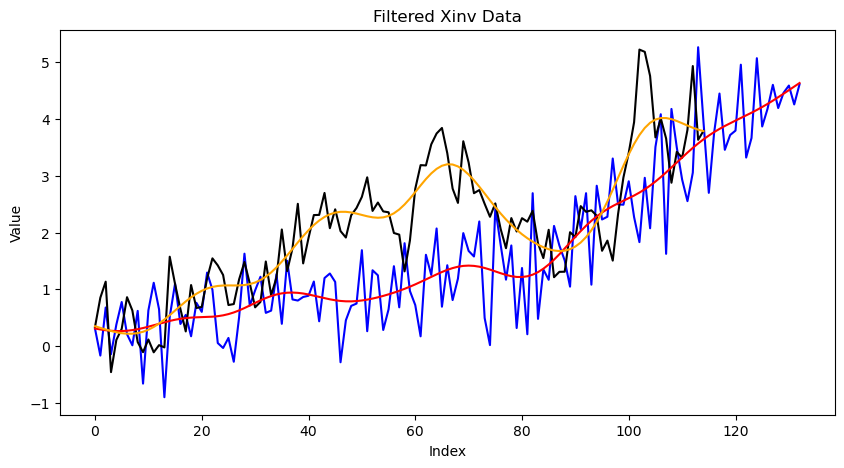

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(np.array(pkl['Xinv'])[0,0,0,0,:].T, color = 'blue')
plt.plot(np.array(pkl['Yinv'])[0,0,0, :].T, color = 'black')
plt.plot(Xinv_filt[0,0,0,0,:].T, color = 'red')
plt.plot(Yinv_filt[0,0,0,:].T, color = 'orange')
plt.title('Filtered Xinv Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [2]:
import pickle
import pandas as pd

path = "stagelong/projetlong/data_source_dr/Region17/train-hist_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p"
# Ouverture du fichier pickle en mode lecture binaire
with open(path, 'rb') as f:
    inv_aer = pickle.load(f)
    
# en dataframe
pd.DataFrame(inv_aer)

,model,1850,1851,1852,1853,1854,1855,1856,1857,1858,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,ACCESS-ESM1-5,0.601786,0.505126,-0.496597,0.237542,-0.594033,0.294847,-0.955828,-0.182447,-0.881407,...,1.995800,0.909917,0.984134,0.823667,1.096712,0.938989,1.549593,1.105648,0.707274,1.770161
1,ACCESS-ESM1-5,0.548474,1.146361,0.823825,0.518304,-0.362601,0.815279,-0.473810,-1.071883,-0.259505,...,1.190692,2.110014,1.004192,0.391657,1.549159,1.752665,2.397556,0.439045,0.698542,1.019065
2,ACCESS-ESM1-5,-0.310374,0.469808,-0.431458,0.300585,-0.664756,0.721341,0.629012,0.023475,-0.290944,...,-0.259769,2.262013,2.176392,1.883624,2.036826,1.378895,1.419171,2.176774,2.425139,2.602044
3,ACCESS-ESM1-5,0.134248,0.294210,0.311192,-0.259814,0.109446,-0.490445,0.229318,0.465589,0.753104,...,1.794934,0.648200,0.432060,1.362557,1.877069,1.287280,1.113347,0.558710,0.951331,1.768116
4,ACCESS-ESM1-5,0.601786,0.505126,-0.496597,0.237542,-0.594033,0.294847,-0.955828,-0.182447,-0.881407,...,1.995800,0.909917,0.984134,0.823667,1.096712,0.938989,1.549593,1.105648,0.707274,1.770161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,NorESM2-LM,-0.682709,-0.063991,0.017432,1.135820,-0.341227,0.241785,-0.076730,0.529112,-0.811938,...,-0.073985,0.737965,1.397683,1.531309,-0.101620,1.140308,1.709888,0.588456,1.373680,2.257385
11996,NorESM2-LM,-0.682709,-0.063991,0.017432,1.135820,-0.341227,0.241785,-0.076730,0.529112,-0.811938,...,-0.073985,0.737965,1.397683,1.531309,-0.101620,1.140308,1.709888,0.588456,1.373680,2.257385
11997,NorESM2-LM,0.553484,-0.789455,1.111549,0.000742,0.408174,-0.142882,1.184768,0.519876,0.303199,...,0.236396,0.151897,0.361275,-0.529370,0.333802,-0.530524,-0.168112,0.719393,1.465843,1.417198
11998,NorESM2-LM,0.002530,-0.133086,-1.382033,-0.464325,-0.138021,0.233097,0.231969,0.730684,0.471168,...,-1.547462,-2.092118,0.430654,-0.046943,0.178598,-0.299178,0.628568,0.000078,1.101046,1.494459


In [6]:
import numpy as np
import pandas as pd

# Lire le fichier CSV en DataFrame
path = 'historical_17.csv'
data_hist_df = pd.read_csv(path)

'''
# Sélectionner les colonnes correspondant aux années
years = data_ghg_df.columns[2:]

# Calculer la moyenne par modèle
mean_by_model = data_ghg_df.groupby('modele')[years].mean().values

# Réorganiser les dimensions du tenseur
mean_by_model = np.expand_dims(mean_by_model, axis=1)
mean_by_model = np.transpose(mean_by_model, (1, 0, 2)).reshape(12, 1, 165)
'''
# stocker en un .npy
#np.save('ROF_review_no_mean/mean_by_model_nat.npy', mean_by_model)

data_hist_df

,modele,Variable,0,1,2,3,4,5,6,7,...,155,156,157,158,159,160,161,162,163,164
0,ACCESS-ESM1-5,tas_r10i1p1f1_ano,0.055733,-0.442172,0.574464,-1.757159,-1.197088,0.024807,1.084215,-0.163250,...,1.423973,1.238448,1.957734,0.738855,0.573984,-0.222426,1.546955,1.142446,0.970525,1.024318
1,ACCESS-ESM1-5,tas_r11i1p1f1_ano,0.601786,0.505126,-0.496597,0.237542,-0.594033,0.294847,-0.955828,-0.182447,...,1.995800,0.909917,0.984134,0.823667,1.096712,0.938989,1.549593,1.105648,0.707274,1.770161
2,ACCESS-ESM1-5,tas_r12i1p1f1_ano,0.134248,0.294210,0.311192,-0.259814,0.109446,-0.490445,0.229318,0.465589,...,1.794934,0.648200,0.432060,1.362557,1.877069,1.287280,1.113347,0.558710,0.951331,1.768116
3,ACCESS-ESM1-5,tas_r13i1p1f1_ano,0.127077,0.708122,-0.034804,1.005058,0.160603,0.533288,-0.325096,-0.127922,...,0.891868,0.282633,0.628918,0.131810,0.284373,0.919221,0.727035,1.475180,1.707652,0.716208
4,ACCESS-ESM1-5,tas_r14i1p1f1_ano,-0.010190,-0.531772,0.199171,0.284640,-0.367784,-0.174294,-0.075570,0.743845,...,1.962465,-0.594629,0.776938,0.831330,0.772375,1.750149,0.196872,2.826106,0.687190,2.097823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,MRI-ESM2-0,tas_r8i1p1f1_ano,-0.054183,0.457448,0.227907,0.457257,0.809757,-0.218070,0.309102,-0.951983,...,0.170307,0.891585,0.993428,1.501378,0.972926,0.330655,1.198274,1.571389,0.978132,1.610734
252,MRI-ESM2-0,tas_r9i1p1f1_ano,0.484921,-0.344404,0.325587,-0.434919,0.114711,-0.546783,1.181578,1.459479,...,1.311316,0.994950,0.910603,1.966671,0.997616,1.148852,0.768794,1.471710,1.417550,0.916933
253,NorESM2-LM,tas_r1i1p1f1_ano,-0.682709,-0.063991,0.017432,1.135820,-0.341227,0.241785,-0.076730,0.529112,...,-0.073985,0.737965,1.397683,1.531309,-0.101620,1.140308,1.709888,0.588456,1.373680,2.257385
254,NorESM2-LM,tas_r2i1p1f1_ano,0.553484,-0.789455,1.111549,0.000742,0.408174,-0.142882,1.184768,0.519876,...,0.236396,0.151897,0.361275,-0.529370,0.333802,-0.530524,-0.168112,0.719393,1.465843,1.417198


In [65]:
import numpy as np
import pandas as pd

# Lire le fichier CSV en DataFrame
path = 'hist-nat_17.csv'
data_hist_df = pd.read_csv(path)

# Sélectionner les colonnes correspondant aux 115 dernières années
last_115_years = data_hist_df.iloc[:, -117:-2]

# Ajouter la colonne 'modele' au DataFrame des 115 dernières années
last_115_years['modele'] = data_hist_df['modele']

# Grouper les données par modèle
grouped_data = last_115_years.groupby('modele')

# Parcourir chaque groupe et calculer la moyenne
for model, group in grouped_data:
    # Sélectionner les colonnes contenant les valeurs numériques
    numeric_columns = group.columns[:-1]
    # Calculer la moyenne pour chaque colonne
    group_mean = group[numeric_columns].mean()
    # Convertir la moyenne en un tableau numpy
    group_mean_array = group_mean.to_numpy()
    # Enregistrer le tableau numpy dans un fichier .npy
    np.save(f'figures/Europe/nat_{model}.npy', group_mean_array)

In [21]:
import numpy as np
import pandas as pd

# Lire le fichier CSV en DataFrame
path = 'historical_17.csv'
data_hist_df = pd.read_csv(path)

# Sélectionner les colonnes correspondant aux 115 dernières années
last_115_years = data_hist_df.iloc[:, -117:-2]

# Ajouter la colonne 'modele' au DataFrame des 115 dernières années
last_115_years['modele'] = data_hist_df['modele']

# Grouper les données par modèle
grouped_data = last_115_years.groupby('modele')

# Parcourir chaque groupe et stocker les données en .npy
for model, group in grouped_data:
    # Sélectionner les colonnes contenant les valeurs numériques
    numeric_columns = group.columns[:-1]
    # Sélectionner les colonnes contenant les valeurs numériques
    group_data = group[numeric_columns]
    # Enregistrer les données dans un fichier .npy
    np.save(f'figures/Europe/hist_{model}_no_mean.npy', group_data)

In [30]:
import numpy as np
import pandas as pd
import torch

# Lire le fichier CSV en DataFrame
path = 'historical_17.csv'
data_hist_df = pd.read_csv(path)

# Obtenir la liste des modèles uniques
unique_models = data_hist_df['modele'].unique()

# Boucle sur chaque modèle
for model in unique_models:
    # Filtrer les données pour le modèle spécifique
    model_data = data_hist_df[data_hist_df['modele'] == model]
    
    # Sélectionner les 115 dernières années
    last_115_years = model_data.iloc[:, -117:]
    
    # Sélectionner un profil au hasard
    random_profile = last_115_years.sample(n=1, random_state=42)
    
    # Exclure les colonnes non numériques
    numeric_columns = random_profile.columns[2:]
    
    # Sélectionner les valeurs du profil
    profile_values = random_profile[numeric_columns].values.flatten()
    
    # Stocker le profil sélectionné en tant que fichier .pt
    torch.save(torch.from_numpy(profile_values), f'figures/Europe/rand_hist_{model}.pt')

In [10]:
import numpy as np
import pandas as pd

# Lire le fichier CSV en DataFrame
path = 'hist-aer_17.csv'
data_aer_df = pd.read_csv(path)

data_aer_df

,modele,Variable,0,1,2,3,4,5,6,7,...,155,156,157,158,159,160,161,162,163,164
0,ACCESS-ESM1-5,tas_r1i1p1f1_ano,-0.799411,-0.777932,-1.078398,0.132827,-1.312122,0.157479,0.309952,-1.189281,...,-1.059881,-0.887268,-0.469203,-1.630039,-0.874770,-1.278702,-1.625587,-1.074487,-0.042169,-0.159831
1,ACCESS-ESM1-5,tas_r2i1p1f1_ano,0.526621,-0.033313,-0.642813,0.258223,-0.027608,0.361578,0.680096,-0.040082,...,-0.818742,-1.466293,-0.696421,-1.633102,-1.173688,0.351688,-1.059795,0.250638,-1.115099,-0.443628
2,ACCESS-ESM1-5,tas_r3i1p1f1_ano,-0.584722,-0.015025,0.170190,0.229476,-0.700613,0.566379,-0.308285,-0.552223,...,-0.677125,-2.107798,-1.566337,-0.401618,-1.738684,-1.034955,-0.744853,-0.603275,-0.936907,-0.860315
3,BCC-CSM2-MR,tas_r1i1p1f1_ano,-0.944655,-0.282945,-1.117379,-1.083247,-0.679043,-1.262169,-1.657254,0.469087,...,0.159210,-1.119163,-1.771927,-1.961129,-1.187099,-2.126199,-1.725583,-3.073438,-0.754367,-1.106153
4,BCC-CSM2-MR,tas_r2i1p1f1_ano,0.316461,-0.339809,1.210680,2.055328,0.382853,-2.084863,-0.617723,0.295201,...,-1.895318,-1.689296,-1.164804,0.434267,-1.626020,-1.723381,-2.197185,-1.420468,-1.000706,-1.929368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,MRI-ESM2-0,tas_r4i1p1f1_ano,-0.336544,-0.222130,-0.703237,-0.452649,0.459422,-0.701834,0.811945,0.190066,...,-0.302738,-1.167005,-0.101804,-0.325027,-0.987057,-0.492905,-1.663979,-0.879560,-0.275123,-1.379941
85,MRI-ESM2-0,tas_r5i1p1f1_ano,-0.023049,0.040030,-0.358241,0.810708,-0.083790,0.649229,-0.527012,0.170997,...,-0.354074,-0.552737,-0.708652,-0.692260,-0.635746,-0.865019,0.168058,-0.234183,-0.175743,-0.356143
86,NorESM2-LM,tas_r1i1p1f1_ano,0.639770,0.189205,1.114506,1.299481,-0.198358,0.240811,1.653759,1.265301,...,-2.340295,-1.308059,-2.183054,-1.530946,-2.898540,-1.720491,-0.973597,-1.502152,-1.011711,-0.981573
87,NorESM2-LM,tas_r2i1p1f1_ano,-0.380236,-0.199307,0.487855,-0.688501,-0.291494,0.177420,0.322106,-0.064185,...,-1.101070,-2.224190,-1.029407,-1.088932,-1.596926,-1.445488,-2.476718,-1.021967,-1.388335,-1.726257


In [12]:
import numpy as np
import pandas as pd
import torch

# Lire le fichier CSV en DataFrame
path = 'hist-aer_17.csv'
data_aer_df = pd.read_csv(path)

# Créer une liste pour stocker les tenseurs
tenseurs_list = []

# Parcourir chaque modèle et créer un tenseur pour chaque groupe d'instances
for modele, groupe in data_aer_df.groupby('modele'):
    # Sélectionner les 115 dernières années (colonnes 50 à 164)
    annees = groupe.iloc[:, 50:165].values
    
    # Transposer pour obtenir la forme souhaitée (30 tas ou instances x 115 années)
    annees = np.transpose(annees)
    
    # Convertir en tenseur PyTorch
    tenseur = torch.tensor(annees, dtype=torch.float64)
    
    # Ajouter le tenseur à la liste
    tenseurs_list.append(tenseur)

# Vérifier les tailles des tenseurs
for tenseur in tenseurs_list:
    print(tenseur.shape)

# Enregistrer la liste des tenseurs en tant que fichier .pt
torch.save(tenseurs_list, 'figures/Europe/aer.pt')

torch.Size([115, 3])
torch.Size([115, 3])
torch.Size([115, 2])
torch.Size([115, 8])
torch.Size([115, 30])
torch.Size([115, 3])
torch.Size([115, 10])
torch.Size([115, 4])
torch.Size([115, 8])
torch.Size([115, 10])
torch.Size([115, 5])
torch.Size([115, 3])


In [ ]:
'''
cpt = 0
forc_mean = np.load('/net/ether/data/varclim/cbone/data_article_final/forc_mean.npy') 


for model in liste_models:
    historical = np.array(torch.load('/net/ether/data/varclim/cbone/data_article_final/hist_test.pt')[cpt])
    if cpt==12:break
    cpt+=1
    
    
    for hist in range(1):
    

        
        obs = historical[hist]

        
        Mean_orig = np.load('/net/ether/data/varclim/cbone/data_article_final/mean_tls_'+model+'.npy')
        plt.plot(Mean_orig[1])
        plt.show()
        
        mean = np.copy(Mean_orig)

        
        
        #obs = obs - np.mean(obs)
# =============================================================================
#         mean[0] -= np.mean(mean,axis=1)[0]
#         mean[1] -= np.mean(mean,axis=1)[1]
#         mean[2] -= np.mean(mean,axis=1)[2]
#         mean[3] -= np.mean(mean,axis=1)[3]
# =============================================================================

        count = np.load('/net/ether/data/varclim/cbone/data_article_final/count_tls_'+model+'.npy')
        noise = np.load('/net/ether/data/varclim/cbone/data_article_final/noise_tls_'+model+'.npy')
        mean = np.transpose(mean)
        print(mean.shape)
        anom_index = noise.shape[0]
        noise = np.transpose(noise)
        
        (xr,yr,cn1,cn2)=da.reduce_dim(mean,obs[:,None],noise[:,list(range(1,anom_index,2))],noise[:,list(range(0,anom_index,2))])
        print(xr.shape)
        result=da.tls(xr[:,0:3],yr,cn1,ne=count[0:3],cn2=cn2,rof_flag=1,RCT_flag=0)
        name_exp = 'ROF_review_no_mean/'+model+'/'
        path = 'figures/'
        mkdir_p(path+name_exp)
        np.save(path+name_exp+'beta_'+str(hist),result['beta'])
        #np.save(path+name_exp+'rc_mci_'+str(hist),result['rc_mcCI'])
        np.save(path+name_exp+'betaCI_'+str(hist),result['betaCI'])
        
        mean_variab = np.mean(np.delete(variab,cpt-1))
        print(result['beta'])
        for forc in range(3):
            ecart = (result['betaCI'][forc,1] - result['betaCI'][forc,0]) / 2
            ecart = ecart / 1.64
            x_inf=np.zeros((115))
            x_sup=np.zeros((115))
            nn=np.arange(115)
            for i in nn:
                Xn=stats.norm.rvs(size=10000,loc = Mean_orig[forc][i], scale = mean_variab/np.sqrt(count[forc]))
                betan=stats.norm.rvs(size=10000,loc = result['beta'][forc], scale = ecart)
                mult=Xn*betan
                x_inf[i]=np.percentile(mult,5)
                x_sup[i]=np.percentile(mult,95)
        
            plt.fill_between(nn,x_inf,x_sup,alpha=0.5)
            np.save(path+name_exp+str(forc)+'_result_mean_'+str(hist),Mean_orig[forc]*result['beta'][forc])
            np.save(path+name_exp+str(forc)+'_result_min_'+str(hist),x_inf)
            np.save(path+name_exp+str(forc)+'_result_max_'+str(hist),x_sup)
            plt.plot(nn,Mean_orig[forc]*result['beta'][forc])
            plt.legend(['TLS','ROF'])
            plt.savefig(path+name_exp+'mean_'+str(hist)+'.png')
            #plt.plot(nn,mean[:,forc]*result['beta'][forc]+ np.mean(Mean_orig[forc])

    plt.title(model)
    plt.plot(nn,Mean_orig[1],label='Mean orig')
    plt.plot(forc_mean[cpt-1,1],label='Mean True')
    plt.legend()
    plt.title(f"Mean {model}")
    plt.savefig(path+name_exp+'mean_'+str(hist)+'.png')
    plt.show()
'''

In [69]:
# concaténer 4 fichiers .npy
import numpy as np

# Charger les fichiers .npy
ghg_ipsl = np.load('figures/Europe/ghg_IPSL-CM6A-LR.npy')
nat_ipsl = np.load('figures/Europe/nat_IPSL-CM6A-LR.npy')
aer_ipsl = np.load('figures/Europe/aer_IPSL-CM6A-LR.npy')
hist_ipsl = np.load('figures/Europe/hist_IPSL-CM6A-LR.npy')

# shape de chaque fichier
print(ghg_ipsl.shape)
print(nat_ipsl.shape)
print(aer_ipsl.shape)
print(hist_ipsl.shape)

# Concaténer les tableaux verticalement
concatenated_array = np.vstack((ghg_ipsl, nat_ipsl, aer_ipsl, hist_ipsl))

# Vérifier la forme du tableau concaténé
print(concatenated_array.shape)

# sauvegarder le tableau concaténé en un fichier .npy
np.save('figures/Europe/concatenated_IPSL-CM6A-LR.npy', concatenated_array)

(115,)
(115,)
(115,)
(115,)
(4, 115)


In [1]:
import numpy as np

# Liste des forçages
forcings = ['ghg', 'nat', 'aer']

# Liste des modèles
liste_models = ['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CanESM5', 'CESM2', 'CNRM-CM6-1', 'FGOALS-g3',
                'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0', 'NorESM2-LM']

# Créer un tableau vide pour stocker les données
combined_array = np.empty((len(liste_models), len(forcings), 115))

# Parcourir chaque forçage
for i, forcing in enumerate(forcings):
    # Parcourir chaque modèle
    for j, modele in enumerate(liste_models):
        # Charger le fichier .npy correspondant
        file_path = f'figures/Europe/{forcing}_{modele}.npy'
        data = np.load(file_path)
        
        # Ajouter une dimension supplémentaire
        data_expanded = np.expand_dims(data, axis=0)
        
        # Assigner les données au tableau combiné
        combined_array[j, i, :] = data_expanded

# Enregistrer le tableau combiné en tant que fichier .npy
np.save('figures/Europe/combined_data.npy', combined_array)

# Ouvrir le fichier .npy
combined_array = np.load('figures/Europe/combined_data.npy')

print(combined_array.shape)

In [2]:
# Ouvrir le fichier .npy
combined_array = np.load('figures/Europe/combined_data.npy')

print(combined_array.shape)

(12, 3, 115)


In [12]:
# ouvrir les fichiers .npy
ghg = np.load('figures/Europe/ghg_IPSL-CM6A-LR.npy')
aer = np.load('figures/Europe/aer_IPSL-CM6A-LR.npy')
nat = np.load('figures/Europe/nat_IPSL-CM6A-LR.npy')
hist = np.load('figures/Europe/hist_IPSL-CM6A-LR.npy')

print(ghg.shape)
print(aer.shape)
print(nat.shape)
print(hist.shape)

(115,)
(115,)
(115,)
(115,)


In [101]:
# Faire la moyenne par colonne 
import numpy as np

data_hist_df.mean(axis = 0)

# et stocker en array (1,115)
data_hist_mean = np.array(data_hist_df.mean(axis = 0)).reshape(1,165)
data_hist_mean.shape

# stocker en .npy dans le dossier ROF_review_no_mean
#np.save('ROF_review_no_mean/ALL/data_hist_mean.npy', data_hist_mean)

/tmp/ipykernel_2259/124104673.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_hist_df.mean(axis = 0)
/tmp/ipykernel_2259/124104673.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_hist_mean = np.array(data_hist_df.mean(axis = 0)).reshape(1,165)


In [105]:
# ouvrir le fichier .npy
data_ghg_df = np.load('ROF_review_no_mean/ALL/data_ghg_mean.npy')
data_aer_df = np.load('ROF_review_no_mean/ALL/data_aer_mean.npy')
data_nat_df = np.load('ROF_review_no_mean/ALL/data_nat_mean.npy')
data_hist_df = np.load('ROF_review_no_mean/ALL/data_hist_mean.npy')


# concatener les 3 premiers array (GHG, AER, NAT) comme ça 
#data_all = np.concatenate((data_ghg_df, data_aer_df, data_nat_df, data_hist_df), axis = 0)  
import torch

# moyenne des 3 premiers array (GHG, AER, NAT)  
data_all_tot = np.concatenate((data_ghg_df, data_aer_df, data_nat_df), axis = 0)
data_all_tot_mean = np.mean(data_all_tot, axis = 0)
data_all_tot_mean.shape
np.save('ROF_review_no_mean/ALL/data_all_mean_tot.npy', data_all_tot_mean)
# pour data_hist_df passer de .npy à .pt 
data_hist_df = torch.from_numpy(data_hist_df)
# reshape en (165,)
data_hist_df = data_hist_df.reshape(165,)
# save en .pt
torch.save(data_hist_df, 'ROF_review_no_mean/ALL/data_hist_mean_t.pt')
# shape 
data_hist_df.shap

(1, 165)


torch.Size([165])

In [126]:
data_ghg_df = np.load('ROF_review_no_mean/mean_by_model_ghg.npy')
data_aer_df = np.load('ROF_review_no_mean/mean_by_model_aer.npy')
data_nat_df = np.load('ROF_review_no_mean/mean_by_model_nat.npy')

# concatener les 3 premiers array (GHG, AER, NAT) ils sont de (12,1,165) et je veux (12, 3, 165)
data_all = np.concatenate((data_ghg_df, data_aer_df, data_nat_df), axis = 1)
data_all.shape
# save en .npy
np.save('ROF_review_no_mean/mean_by_model_all.npy', data_all)

In [3]:
path_ghg = "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-ghg_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p"
path_nat = "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-nat_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p"
path_aer = "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-aer_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p"
path_hist = "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-hist_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p"

import pickle

# lire ce fichier .p 
def pickle_loader(pickle_file):
    with open(pickle_file, 'rb') as file:
        data = pickle.load(file)
    return data

pkl_ghg = pickle_loader(path_ghg)
pkl_nat = pickle_loader(path_nat)
pkl_aer = pickle_loader(path_aer)
pkl_hist = pickle_loader(path_hist)

# transformer en csv 
import pandas as pd

def pickle_to_csv(pickle_file, csv_file):
    df = pd.DataFrame(pickle_file)
    df.to_csv(csv_file, index=False)
    return df

csv_ghg = pickle_to_csv(pkl_ghg, "ghg.csv")
csv_nat = pickle_to_csv(pkl_nat, "nat.csv")
csv_aer = pickle_to_csv(pkl_aer, "aer.csv")
csv_hist = pickle_to_csv(pkl_hist, "hist.csv")

# enregistrer dans un path
def save_csv(csv_file, path):
    csv_file.to_csv(path, index=False)
    return csv_file

save_csv(csv_ghg, "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/ghg.csv")
save_csv(csv_nat, "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/nat.csv")
save_csv(csv_aer, "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/aer.csv")
save_csv(csv_hist, "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/hist.csv")

,model,1850,1851,1852,1853,1854,1855,1856,1857,1858,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,ACCESS-ESM1-5,0.601786,0.505126,-0.496597,0.237542,-0.594033,0.294847,-0.955828,-0.182447,-0.881407,...,1.995800,0.909917,0.984134,0.823667,1.096712,0.938989,1.549593,1.105648,0.707274,1.770161
1,ACCESS-ESM1-5,0.548474,1.146361,0.823825,0.518304,-0.362601,0.815279,-0.473810,-1.071883,-0.259505,...,1.190692,2.110014,1.004192,0.391657,1.549159,1.752665,2.397556,0.439045,0.698542,1.019065
2,ACCESS-ESM1-5,-0.310374,0.469808,-0.431458,0.300585,-0.664756,0.721341,0.629012,0.023475,-0.290944,...,-0.259769,2.262013,2.176392,1.883624,2.036826,1.378895,1.419171,2.176774,2.425139,2.602044
3,ACCESS-ESM1-5,0.134248,0.294210,0.311192,-0.259814,0.109446,-0.490445,0.229318,0.465589,0.753104,...,1.794934,0.648200,0.432060,1.362557,1.877069,1.287280,1.113347,0.558710,0.951331,1.768116
4,ACCESS-ESM1-5,0.601786,0.505126,-0.496597,0.237542,-0.594033,0.294847,-0.955828,-0.182447,-0.881407,...,1.995800,0.909917,0.984134,0.823667,1.096712,0.938989,1.549593,1.105648,0.707274,1.770161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,NorESM2-LM,-0.682709,-0.063991,0.017432,1.135820,-0.341227,0.241785,-0.076730,0.529112,-0.811938,...,-0.073985,0.737965,1.397683,1.531309,-0.101620,1.140308,1.709888,0.588456,1.373680,2.257385
11996,NorESM2-LM,-0.682709,-0.063991,0.017432,1.135820,-0.341227,0.241785,-0.076730,0.529112,-0.811938,...,-0.073985,0.737965,1.397683,1.531309,-0.101620,1.140308,1.709888,0.588456,1.373680,2.257385
11997,NorESM2-LM,0.553484,-0.789455,1.111549,0.000742,0.408174,-0.142882,1.184768,0.519876,0.303199,...,0.236396,0.151897,0.361275,-0.529370,0.333802,-0.530524,-0.168112,0.719393,1.465843,1.417198
11998,NorESM2-LM,0.002530,-0.133086,-1.382033,-0.464325,-0.138021,0.233097,0.231969,0.730684,0.471168,...,-1.547462,-2.092118,0.430654,-0.046943,0.178598,-0.299178,0.628568,0.000078,1.101046,1.494459


In [4]:
pkl_ghg

,model,1850,1851,1852,1853,1854,1855,1856,1857,1858,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,ACCESS-ESM1-5,-0.890730,-0.185708,0.151511,-1.808030,-0.254455,-0.305464,-0.097872,-0.405693,-0.650359,...,2.179655,2.616795,1.051241,2.998411,0.665481,1.948404,2.137798,2.115355,1.145627,2.315021
1,ACCESS-ESM1-5,-0.798205,-0.762137,1.205322,-0.504540,-0.930353,-0.325261,-0.973762,-0.695398,0.262346,...,2.570548,2.344749,2.280769,1.906171,2.573771,1.888584,1.484526,2.554421,1.230672,1.669958
2,ACCESS-ESM1-5,-0.070414,0.909948,-0.132748,-1.092791,-0.407363,-1.283088,-1.102075,-1.326199,-0.899411,...,2.754341,1.572773,1.489474,1.706247,1.676174,1.908507,1.581271,1.746392,2.092418,1.553889
3,ACCESS-ESM1-5,-0.070414,0.909948,-0.132748,-1.092791,-0.407363,-1.283088,-1.102075,-1.326199,-0.899411,...,2.754341,1.572773,1.489474,1.706247,1.676174,1.908507,1.581271,1.746392,2.092418,1.553889
4,ACCESS-ESM1-5,-0.798205,-0.762137,1.205322,-0.504540,-0.930353,-0.325261,-0.973762,-0.695398,0.262346,...,2.570548,2.344749,2.280769,1.906171,2.573771,1.888584,1.484526,2.554421,1.230672,1.669958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,NorESM2-LM,0.442415,0.262703,0.232307,-1.009595,0.606105,0.403525,0.470375,-0.147158,0.100849,...,1.767805,1.714825,1.126034,0.730765,0.685909,0.825729,0.940168,0.115915,0.610674,0.521692
11996,NorESM2-LM,0.291053,1.072641,1.312943,0.421058,0.466235,-0.536826,0.592358,1.211577,0.519147,...,1.660873,1.189685,1.423778,1.070606,1.143584,0.926265,1.642138,2.327317,1.884647,0.984160
11997,NorESM2-LM,0.291053,1.072641,1.312943,0.421058,0.466235,-0.536826,0.592358,1.211577,0.519147,...,1.660873,1.189685,1.423778,1.070606,1.143584,0.926265,1.642138,2.327317,1.884647,0.984160
11998,NorESM2-LM,0.291053,1.072641,1.312943,0.421058,0.466235,-0.536826,0.592358,1.211577,0.519147,...,1.660873,1.189685,1.423778,1.070606,1.143584,0.926265,1.642138,2.327317,1.884647,0.984160


In [2]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import pickle
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class TimeseriesDatasetOptimized(Dataset):
    def __init__(self, ghg_df, aer_df, nat_df, hist_df):
        """
        Initialize the dataset.
        :param ghg_df: DataFrame for GHG.
        :param aer_df: DataFrame for AER.
        :param nat_df: DataFrame for NAT.
        :param hist_df: DataFrame for historical data.
        """
        # Assuming all dataframes have the same shape and the model column is dropped
        self.ghg_data = ghg_df.drop(columns=["model"]).values
        self.aer_data = aer_df.drop(columns=["model"]).values
        self.nat_data = nat_df.drop(columns=["model"]).values
        self.hist_data = hist_df.drop(columns=["model"]).values
        
    def __len__(self):
        return len(self.ghg_data)
    
    def __getitem__(self, idx):
        """
        Return the data for a given index.
        """
        # Convert the three series for GHG, AER, and NAT into a single numpy array before converting to tensor
        X = torch.tensor(np.array([self.ghg_data[idx], self.aer_data[idx], self.nat_data[idx]]), dtype=torch.float32)
        Y = torch.tensor(self.hist_data[idx], dtype=torch.float32)
        return X, Y


# Load the previously uploaded pickle files
ghg_data = pickle.load(open("/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-ghg_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p", "rb"))
aer_data = pickle.load(open("/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-aer_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p", "rb"))
nat_data = pickle.load(open("/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-nat_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p", "rb"))
hist_data = pickle.load(open("/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-hist_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p", "rb"))

# Assuming the data is loaded
# Create an instance of the TimeseriesDatasetOptimized
dataset_optimized = TimeseriesDatasetOptimized(ghg_data, aer_data, nat_data, hist_data)

# Fetch the first item to check if it's working correctly and the warning is gone
sample_input_optimized, sample_output_optimized = dataset_optimized[0]
print(sample_input_optimized.shape, sample_output_optimized.shape)

class UNet1DWithCrop(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet1DWithCrop, self).__init__()
        
        # Encoder (downsampling)
        self.enc1 = self.conv_block(in_channels, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)  # Added depth
        
        # Decoder (upsampling)
        self.up4 = self.up_block(512, 256)     # Added depth
        self.up3 = self.up_block(256, 128)
        self.up2 = self.up_block(128, 64)
        self.up1 = self.up_block(64, out_channels)
        
    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)
        e2 = self.enc2(e1)
        e3 = self.enc3(e2)
        e4 = self.enc4(e3)  # Added depth
        
        # Decoder with cropping for skip connections
        d4 = self.up4(e4)
        d3 = self.up3(self.crop_and_add(d4, e3))
        d2 = self.up2(self.crop_and_add(d3, e2))
        d1 = self.up1(self.crop_and_add(d2, e1))
        
        return d1
        
    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),  # Added BatchNorm
            nn.ReLU(inplace=True),
            nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),  # Added BatchNorm
            nn.ReLU(inplace=True),
            nn.MaxPool1d(2)
        )
    
    def up_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),  # Added BatchNorm
            nn.ReLU(inplace=True),
            nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),  # Added BatchNorm
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2, mode='nearest')
        )
    
    def crop_and_add(self, x1, x2):
        """
        Crop x2 to the size of x1 and add them.
        """
        diff = x2.size()[2] - x1.size()[2]
        x2 = x2[:, :, diff // 2: diff // 2 + x1.size()[2]]
        return x1 + x2

# Create a UNet model instance with cropping
unet_model_with_crop = UNet1DWithCrop(in_channels=3, out_channels=1)
sample_unet_output_with_crop = unet_model_with_crop(sample_input_optimized.unsqueeze(0))
print(sample_unet_output_with_crop.shape) 

ghg_test = "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/test-ghg_TTDGM2-S0-GAN15pc-NMx1000_z17v0_df.p"
aer_test = "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/test-aer_TTDGM2-S0-GAN15pc-NMx1000_z17v0_df.p"
nat_test = "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/test-nat_TTDGM2-S0-GAN15pc-NMx1000_z17v0_df.p"
hist_test = "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/test-hist_TTDGM2-S0-GAN15pc-NMx1000_z17v0_df.p"

# Charger les données de test
ghg_data_test = pickle.load(open(ghg_test, "rb"))
aer_data_test = pickle.load(open(aer_test, "rb"))
nat_data_test = pickle.load(open(nat_test, "rb"))
hist_data_test = pickle.load(open(hist_test, "rb"))

# Créer un ensemble de données pour le test
dataset_test = TimeseriesDatasetOptimized(ghg_data_test, aer_data_test, nat_data_test, hist_data_test)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(unet_model_with_crop.parameters(), lr=0.00001)

num_epochs = 100
train_loader = DataLoader(dataset_optimized, batch_size=32, shuffle=True)

# 1. Séparation des données
train_indices, val_indices = train_test_split(np.arange(len(dataset_optimized)), test_size=0.1, random_state=42)
train_dataset = torch.utils.data.Subset(dataset_optimized, train_indices)
val_dataset = torch.utils.data.Subset(dataset_optimized, val_indices)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


best_val_loss = float("inf")
patience = 10
no_improve_epochs = 0

# 1. Initialisation des listes de stockage
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    unet_model_with_crop.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = unet_model_with_crop(inputs)
        
        labels_cropped = labels[:, :outputs.shape[2]]
        loss = criterion(outputs, labels_cropped.unsqueeze(1))
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * inputs.size(0)
    
    epoch_loss = running_loss / len(dataset_optimized)

    # 2. Évaluation sur l'ensemble de validation
    unet_model_with_crop.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = unet_model_with_crop(inputs)
            labels_cropped = labels[:, :outputs.shape[2]]
            loss = criterion(outputs, labels_cropped.unsqueeze(1))
            val_loss += loss.item() * inputs.size(0)
    
    val_loss /= len(val_dataset)
    
    # Mise à jour des listes avec les pertes courantes
    train_losses.append(epoch_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs} - Training Loss: {epoch_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # 3 & 4. Vérifier si c'est le meilleur modèle et Arrêt précoce
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(unet_model_with_crop.state_dict(), "best_model.pth")
        no_improve_epochs = 0
    else:
        no_improve_epochs += 1

    if no_improve_epochs >= patience:
        print("Arrêt précoce!")
        break

# Charger le meilleur modèle
unet_model_with_crop.load_state_dict(torch.load("best_model.pth"))

    
unet_model_with_crop.eval()
test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False)

all_outputs = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = unet_model_with_crop(inputs)
        all_outputs.append(outputs.cpu().numpy())
        
        # Rogner les étiquettes pour correspondre à la taille de sortie
        labels_cropped = labels[:, :outputs.shape[2]]
        all_labels.append(labels_cropped.cpu().numpy())

all_outputs = np.concatenate(all_outputs)
all_labels = np.concatenate(all_labels)

# Calculer la MSE sur l'ensemble de test
test_mse = ((all_outputs - all_labels) ** 2).mean()
print(f"Test MSE: {test_mse:.4f}")

# 3. Visualisation après l'entraînement
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
# titre avec les paramètres de l'unet
plt.title(f"Loss curves U-net")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig("/net/pallas/usr/neuro/com/habbar/projet/data_nc/Figs/u-net/loss_curve.png") 
plt.close() 

torch.Size([3, 165]) torch.Size([165])
torch.Size([1, 1, 160])


[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


Epoch 1/100 - Training Loss: 0.6797, Validation Loss: 0.6984


Epoch 2/100 - Training Loss: 0.5939, Validation Loss: 0.6524
Epoch 3/100 - Training Loss: 0.5759, Validation Loss: 0.6387
Epoch 4/100 - Training Loss: 0.5660, Validation Loss: 0.6295
Epoch 5/100 - Training Loss: 0.5579, Validation Loss: 0.6184
Epoch 6/100 - Training Loss: 0.5495, Validation Loss: 0.6101
Epoch 7/100 - Training Loss: 0.5389, Validation Loss: 0.6087
Epoch 8/100 - Training Loss: 0.5276, Validation Loss: 0.5861
Epoch 9/100 - Training Loss: 0.5147, Validation Loss: 0.5741
Epoch 10/100 - Training Loss: 0.5029, Validation Loss: 0.5567
Epoch 11/100 - Training Loss: 0.4917, Validation Loss: 0.5499
Epoch 12/100 - Training Loss: 0.4849, Validation Loss: 0.5386
Epoch 13/100 - Training Loss: 0.4787, Validation Loss: 0.5345
Epoch 14/100 - Training Loss: 0.4736, Validation Loss: 0.5302
Epoch 15/100 - Training Loss: 0.4705, Validation Loss: 0.5287
Epoch 16/100 - Training Loss: 0.4656, Validation Loss: 0.5236
Epoch 17/100 - Training Loss: 0.4635, Validation Loss: 0.5217
Epoch 18/100 - T

In [7]:
from torchsummary import summary

# Assurez-vous que le modèle est sur le même appareil que les données d'entrée (CPU dans cet exemple)
unet_model_with_crop.to('cpu')

# Utilisez la fonction summary pour visualiser l'architecture
# Vous devez spécifier la taille d'entrée de votre modèle
input_size = (3, sample_input_optimized.shape[1])  # 3 channels, longueur de la série temporelle
summary(unet_model_with_crop, input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 64, 165]             640
       BatchNorm1d-2              [-1, 64, 165]             128
              ReLU-3              [-1, 64, 165]               0
            Conv1d-4              [-1, 64, 165]          12,352
       BatchNorm1d-5              [-1, 64, 165]             128
              ReLU-6              [-1, 64, 165]               0
         MaxPool1d-7               [-1, 64, 82]               0
            Conv1d-8              [-1, 128, 82]          24,704
       BatchNorm1d-9              [-1, 128, 82]             256
             ReLU-10              [-1, 128, 82]               0
           Conv1d-11              [-1, 128, 82]          49,280
      BatchNorm1d-12              [-1, 128, 82]             256
             ReLU-13              [-1, 128, 82]               0
        MaxPool1d-14              [-1, 

In [1]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import pickle
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class TimeseriesDatasetOptimized(Dataset):
    def __init__(self, ghg_df, aer_df, nat_df, hist_df):
        """
        Initialize the dataset.
        :param ghg_df: DataFrame for GHG.
        :param aer_df: DataFrame for AER.
        :param nat_df: DataFrame for NAT.
        :param hist_df: DataFrame for historical data.
        """
        # Assuming all dataframes have the same shape and the model column is dropped
        self.ghg_data = ghg_df.drop(columns=["model"]).values
        self.aer_data = aer_df.drop(columns=["model"]).values
        self.nat_data = nat_df.drop(columns=["model"]).values
        self.hist_data = hist_df.drop(columns=["model"]).values
        
    def __len__(self):
        return len(self.ghg_data)
    
    def __getitem__(self, idx):
        """
        Return the data for a given index.
        """
        # Convert the three series for GHG, AER, and NAT into a single numpy array before converting to tensor
        X = torch.tensor(np.array([self.ghg_data[idx], self.aer_data[idx], self.nat_data[idx]]), dtype=torch.float32)
        Y = torch.tensor(self.hist_data[idx], dtype=torch.float32)
        return X, Y


# Load the previously uploaded pickle files
ghg_data = pickle.load(open("/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-ghg_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p", "rb"))
aer_data = pickle.load(open("/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-aer_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p", "rb"))
nat_data = pickle.load(open("/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-nat_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p", "rb"))
hist_data = pickle.load(open("/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-hist_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p", "rb"))

# Assuming the data is loaded
# Create an instance of the TimeseriesDatasetOptimized
dataset_optimized = TimeseriesDatasetOptimized(ghg_data, aer_data, nat_data, hist_data)

# Fetch the first item to check if it's working correctly and the warning is gone
sample_input_optimized, sample_output_optimized = dataset_optimized[0]
print(sample_input_optimized.shape, sample_output_optimized.shape)

class UNet1DWithCrop(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet1DWithCrop, self).__init__()
        
        # Encoder (downsampling)
        self.enc1 = self.conv_block(in_channels, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)  # Added depth
        
        # Decoder (upsampling)
        self.up4 = self.up_block(512, 256)     # Added depth
        self.up3 = self.up_block(256, 128)
        self.up2 = self.up_block(128, 64)
        self.up1 = self.up_block(64, out_channels)
        
    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)
        e2 = self.enc2(e1)
        e3 = self.enc3(e2)
        e4 = self.enc4(e3)  # Added depth
        
        # Decoder with cropping for skip connections
        d4 = self.up4(e4)
        d3 = self.up3(self.crop_and_add(d4, e3))
        d2 = self.up2(self.crop_and_add(d3, e2))
        d1 = self.up1(self.crop_and_add(d2, e1))
        
        return d1
        
    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),  # Added BatchNorm
            nn.ReLU(inplace=True),
            nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),  # Added BatchNorm
            nn.ReLU(inplace=True),
            nn.MaxPool1d(2)
        )
    
    def up_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),  # Added BatchNorm
            nn.ReLU(inplace=True),
            nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),  # Added BatchNorm
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2, mode='nearest')
        )
    
    def crop_and_add(self, x1, x2):
        """
        Crop x2 to the size of x1 and add them.
        """
        diff = x2.size()[2] - x1.size()[2]
        x2 = x2[:, :, diff // 2: diff // 2 + x1.size()[2]]
        return x1 + x2

# Create a UNet model instance with cropping
unet_model_with_crop = UNet1DWithCrop(in_channels=3, out_channels=1)
sample_unet_output_with_crop = unet_model_with_crop(sample_input_optimized.unsqueeze(0))
print(sample_unet_output_with_crop.shape) 

torch.Size([3, 165]) torch.Size([165])
torch.Size([1, 1, 160])


In [ ]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import pickle
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

torch.manual_seed(0)
np.random.seed(0)

# Function to load pickled data
def pickle_loader(file_path):
    return pickle.load(open(file_path, "rb"))


# Function to reset the weights of the model
def weight_reset(m):
    if isinstance(m, nn.Conv1d) or isinstance(m, nn.Linear):
        m.reset_parameters()


# Existing code for dataset and model definition
class TimeseriesDatasetOptimized(Dataset):
    def __init__(self, ghg_df, aer_df, nat_df, hist_df):
        self.ghg_data = ghg_df.drop(columns=["model"]).values
        self.aer_data = aer_df.drop(columns=["model"]).values
        self.nat_data = nat_df.drop(columns=["model"]).values
        self.hist_data = hist_df.drop(columns=["model"]).values

    def __len__(self):
        return len(self.ghg_data)

    def __getitem__(self, idx):
        X = torch.tensor(np.array([self.ghg_data[idx], self.aer_data[idx], self.nat_data[idx]]), dtype=torch.float32)
        Y = torch.tensor(self.hist_data[idx], dtype=torch.float32)
        return X, Y


# Class definition for the UNet model
class UNet1DWithCrop(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet1DWithCrop, self).__init__()
        
        # Encoder (downsampling)
        self.enc1 = self.conv_block(in_channels, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)
        self.enc4 = self.conv_block(256, 512)  # Added depth
        
        # Decoder (upsampling)
        self.up4 = self.up_block(512, 256)     # Added depth
        self.up3 = self.up_block(256, 128)
        self.up2 = self.up_block(128, 64)
        self.up1 = self.up_block(64, out_channels)
        
    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)
        e2 = self.enc2(e1)
        e3 = self.enc3(e2)
        e4 = self.enc4(e3)  # Added depth
        
        # Decoder with cropping for skip connections
        d4 = self.up4(e4)
        d3 = self.up3(self.crop_and_add(d4, e3))
        d2 = self.up2(self.crop_and_add(d3, e2))
        d1 = self.up1(self.crop_and_add(d2, e1))
        
        return d1
        
    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),  # Added BatchNorm
            nn.ReLU(inplace=True),
            nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),  # Added BatchNorm
            nn.ReLU(inplace=True),
            nn.MaxPool1d(2),
        )
    
    def up_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),  # Added BatchNorm
            nn.ReLU(inplace=True),
            nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm1d(out_channels),  # Added BatchNorm
            nn.ReLU(inplace=True),
            nn.Upsample(scale_factor=2, mode='nearest'),
        )
    
    def crop_and_add(self, x1, x2):
        """
        Crop x2 to the size of x1 and add them.
        """
        diff = x2.size()[2] - x1.size()[2]
        x2 = x2[:, :, diff // 2: diff // 2 + x1.size()[2]]
        return x1 + x2
    
model = UNet1DWithCrop(in_channels=3, out_channels=1)
print(model)

# Data Paths
train_data_paths = {
    'ghg': "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-ghg_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p",
    'aer': "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-aer_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p",
    'nat': "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-nat_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p",
    'hist': "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/train-hist_TTDGM2-S0-GAN85pc-N1000_z17v0_df.p"
}

test_data_paths = {
    'ghg': "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/test-ghg_TTDGM2-S0-GAN15pc-NMx1000_z17v0_df.p",
    'aer': "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/test-aer_TTDGM2-S0-GAN15pc-NMx1000_z17v0_df.p",
    'nat': "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/test-nat_TTDGM2-S0-GAN15pc-NMx1000_z17v0_df.p",
    'hist': "/net/pallas/usr/neuro/com/habbar/projet/data_nc/stagelong/projetlong/data_source_dr/Region17/test-hist_TTDGM2-S0-GAN15pc-NMx1000_z17v0_df.p"
}

# Load the training data
ghg_data_train = pickle_loader(train_data_paths['ghg'])
aer_data_train = pickle_loader(train_data_paths['aer'])
nat_data_train = pickle_loader(train_data_paths['nat'])
hist_data_train = pickle_loader(train_data_paths['hist'])

# Create an instance of the TimeseriesDatasetOptimized
dataset_optimized = TimeseriesDatasetOptimized(ghg_data_train, aer_data_train, nat_data_train, hist_data_train)

# Create a UNet model instance with cropping
unet_model_with_crop = UNet1DWithCrop(in_channels=3, out_channels=1)

# List of model names
model_names = ['ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CESM2', 'CNRM-CM6-1', 'CanESM5', 'FGOALS-g3', 'GISS-E2-1-G',
               'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0', 'NorESM2-LM']
model_names = ['FGOALS-g3',
               'HadGEM3-GC31-LL', 'IPSL-CM6A-LR']

# Initialize an empty dictionary to store MSE for each excluded model
mse_per_model = {}
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(unet_model_with_crop.parameters(), lr=0.001)

num_epochs = 150
train_loader = DataLoader(dataset_optimized, batch_size=32, shuffle=True)

# 1. Séparation des données
train_indices, val_indices = train_test_split(np.arange(len(dataset_optimized)), test_size=0.1, random_state=42)
train_dataset = torch.utils.data.Subset(dataset_optimized, train_indices)
val_dataset = torch.utils.data.Subset(dataset_optimized, val_indices)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Réinitialiser les compteurs et les pertes, etc.
best_val_loss = float("inf")
patience = 10
no_improve_epochs = 0
# Loop through each model to exclude it
for model_to_exclude in model_names:
    print(f"Excluding model: {model_to_exclude}")
    
    model_dir = f"/net/pallas/usr/neuro/com/habbar/projet/data_nc/Figs/u-net/{model_to_exclude}"
    best_model_path = f"{model_dir}/best_model.pth"
    
    # Load state dict from the saved model file, if it exists
    if os.path.exists(best_model_path):
        saved_state_dict = torch.load(best_model_path)

        # Get state dict of the current model
        model_state_dict = unet_model_with_crop.state_dict()

        # Check if keys match between saved model and current model
        if set(saved_state_dict.keys()) == set(model_state_dict.keys()):
            unet_model_with_crop.load_state_dict(saved_state_dict)
            print(f"Successfully loaded model from {best_model_path}.")
        else:
            print(f"Could not load model from {best_model_path} as the architectures do not match.")
    
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
        
    best_model_path = f"{model_dir}/best_model.pth"
    train_loss_path = f"{model_dir}/train_losses.npy"
    val_loss_path = f"{model_dir}/val_losses.npy"
    
    # Load previous best validation loss and RMSE if they exist
    prev_best_val_loss = float('inf')
    prev_best_rmse = float('inf')
    
    if os.path.exists(best_model_path):
        # Load the previously saved model and get its validation loss
        unet_model_with_crop.load_state_dict(torch.load(best_model_path), strict=False)
        
        # Assume that the best validation loss is saved in a text file or some other method
        if os.path.exists(val_loss_path):
            prev_best_val_loss = np.min(np.load(val_loss_path))
    
    if os.path.exists(f"{model_dir}/best_rmse.txt"):
        with open(f"{model_dir}/best_rmse.txt", 'r') as f:
            prev_best_rmse = float(f.read().strip())

    # Load and filter the data
    ghg_data_train_filtered = pickle_loader(train_data_paths['ghg']).query(f'model != "{model_to_exclude}"')
    aer_data_train_filtered = pickle_loader(train_data_paths['aer']).query(f'model != "{model_to_exclude}"')
    nat_data_train_filtered = pickle_loader(train_data_paths['nat']).query(f'model != "{model_to_exclude}"')
    hist_data_train_filtered = pickle_loader(train_data_paths['hist']).query(f'model != "{model_to_exclude}"')

    ghg_data_test_filtered = pickle_loader(test_data_paths['ghg']).query(f'model == "{model_to_exclude}"')
    aer_data_test_filtered = pickle_loader(test_data_paths['aer']).query(f'model == "{model_to_exclude}"')
    nat_data_test_filtered = pickle_loader(test_data_paths['nat']).query(f'model == "{model_to_exclude}"')
    hist_data_test_filtered = pickle_loader(test_data_paths['hist']).query(f'model == "{model_to_exclude}"')

    # Create instances of TimeseriesDatasetOptimized
    dataset_train = TimeseriesDatasetOptimized(ghg_data_train_filtered, aer_data_train_filtered,
                                               nat_data_train_filtered, hist_data_train_filtered)
    dataset_test = TimeseriesDatasetOptimized(ghg_data_test_filtered, aer_data_test_filtered,
                                              nat_data_test_filtered, hist_data_test_filtered)

    # Reset lists for storing train and validation losses
    train_losses = []
    val_losses = []

    # Reset the best validation loss
    best_val_loss = float("inf")

    # Reset the model's parameters to their initial state
    unet_model_with_crop.apply(weight_reset)

    # Your training and testing code here...
    for epoch in range(num_epochs):
        unet_model_with_crop.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = unet_model_with_crop(inputs)
            
            labels_cropped = labels[:, :outputs.shape[2]]
            loss = criterion(outputs, labels_cropped.unsqueeze(1))
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
        
        epoch_loss = running_loss / len(dataset_optimized)

        # 2. Évaluation sur l'ensemble de validation
        unet_model_with_crop.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = unet_model_with_crop(inputs)
                labels_cropped = labels[:, :outputs.shape[2]]
                loss = criterion(outputs, labels_cropped.unsqueeze(1))
                val_loss += loss.item() * inputs.size(0)
        
        val_loss /= len(val_dataset)
        
        # Mise à jour des listes avec les pertes courantes
        train_losses.append(epoch_loss)
        val_losses.append(val_loss)

        print(f"Epoch {epoch+1}/{num_epochs} - Training Loss: {epoch_loss:.4f}, Validation Loss: {val_loss:.4f}")

        # 3 & 4. Vérifier si c'est le meilleur modèle et Arrêt précoce
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            #torch.save(unet_model_with_crop.state_dict(), f"{model_dir}/best_model.pth")
            no_improve_epochs = 0

        else:
            no_improve_epochs += 1

        if no_improve_epochs >= patience:
            print("Arrêt précoce!")
            break

    # Charger le meilleur modèle dans le dossier du modèle
    unet_model_with_crop.load_state_dict(torch.load(f"{model_dir}/best_model.pth"))

    # Mettre le modèle en mode d'évaluation pour l'inférence
    unet_model_with_crop.eval()
    
    if best_val_loss < prev_best_val_loss:
        torch.save(unet_model_with_crop.state_dict(), best_model_path)
        np.save(train_loss_path, np.array(train_losses))
        np.save(val_loss_path, np.array(val_losses))

    test_loader = DataLoader(dataset_test, batch_size=32, shuffle=False)

    all_outputs = []
    all_labels = []

    # Votre code d'inférence reste le même
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = unet_model_with_crop(inputs)
            all_outputs.append(outputs.cpu().numpy())
            
            # Rogner les étiquettes pour correspondre à la taille de sortie
            labels_cropped = labels[:, :outputs.shape[2]]
            all_labels.append(labels_cropped.cpu().numpy())


    all_outputs = np.concatenate(all_outputs)
    all_labels = np.concatenate(all_labels)
    
    # Sauvegardez les valeurs des pertes dans le dossier du modèle
    np.save(f"{model_dir}/train_losses.npy", np.array(train_losses))
    np.save(f"{model_dir}/val_losses.npy", np.array(val_losses))

    # Calculer la MSE sur l'ensemble de test
    test_mse = ((all_outputs - all_labels) ** 2).mean()
    # Calculer la RMSE
    test_rmse = np.sqrt(test_mse)
    if test_rmse < prev_best_rmse:
        with open(f"{model_dir}/best_rmse.txt", 'w') as f:
            f.write(str(test_rmse))
            
    print(f"Test RMSE for {model_to_exclude}: {test_rmse:.4f}")

    # Stocker la RMSE pour ce modèle dans le dictionnaire
    mse_per_model[model_to_exclude] = test_rmse
    tolerance = 0.5
    correct_predictions = torch.abs(all_outputs - all_labels) <= tolerance
    accuracy = torch.mean(correct_predictions.float())
    
    # 3. Visualisation après l'entraînement
    plt.figure(figsize=(12, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    
    # titre avec les paramètres de l'unet
    plt.title(f"Loss curves U-net [Training for {model_to_exclude}][TTDGM2-S0-GAN85pc-N1000_z17v0]-epochs{num_epochs}-lr{0.001}-bs{32}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    
    # Ajout de la valeur RMSE et de l'exactitude à la légende (en haut à droite)
    plt.annotate(f"RMSE: {test_rmse:.4f}\nAccuracy: {accuracy:.4f}",
                 xy=(1, 1), xycoords='axes fraction',
                 xytext=(-10, -10), textcoords='offset points',
                 ha='right', va='top')
    
    # Utiliser une notation scientifique pour l'axe des ordonnées
    plt.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
    
    plt.legend()
    plt.grid(True)
    plt.savefig(f"{model_dir}/loss_curve.png")
    plt.close()

    
    print("=========================================================================\n-------------------------------------------------------------------------\n=========================================================================")

In [2]:
from PIL import Image

models = ['CanESM5', 'FGOALS-g3', 
        'HadGEM3-GC31-LL', 'IPSL-CM6A-LR']

for model in models:
    # Charger les deux images
    image1 = Image.open(f"/net/pallas/usr/neuro/com/habbar/projet/data_nc/Figs/out_v5_nn1-TTDGM2-S0-GAN85pc-N1000_z17v0_4mod_NewNet/CNN_Ks7-7-7_nCh24_Reg0.0005_XtrNO-EXTRAP_e500_bs100_Lr0.001-VfT15/Training-for-mod_{model}/FigNb5_TrainTestInvEssais-vPL0_loss-curves_1NNets+Val2nd.png")
    image2 = Image.open(f"/net/pallas/usr/neuro/com/habbar/projet/data_nc/Figs/u-net/{model}/loss_curve.png")

    # Redimensionner les images si nécessaire (pour qu'elles aient la même hauteur)
    if image1.size[1] != image2.size[1]:
        image1 = image1.resize((image2.size[0], image2.size[1]))

    # Concaténer les images
    concatenated_image = Image.new('RGB', (image1.width + image2.width, image1.height))
    concatenated_image.paste(image1, (0, 0))
    concatenated_image.paste(image2, (image1.width, 0))

    # Sauvegarder l'image résultante
    concatenated_image.save(f"/net/pallas/usr/neuro/com/habbar/projet/data_nc/Figs/u-net/{model}/comparison_train_val_{model}.png")